In [1]:
import numpy as np
import pandas as pd
import os
import gzip
import io
import matplotlib.pyplot as plt
import seaborn as sns

# Предобработка логов

In [2]:
# vibo: папка где лежат сырые логи
# vibo: ВАЖНО!!! ФАЙЛЫ В ПАПКЕ ДОЛЖНЫ БЫТЬ ОТСОРТИРОВАНЫ ОТ СТАРЫХ К НОВЫМ
# (latest.log...ok - должен прочитаться последним)
link = '/content/drive/MyDrive/minecraft/logs/'

In [3]:
# vibo: задаем имена установленных плагинов
plug_names = ['WorldEdit', 'WorldGuard', 'HolographicDisplays']

In [4]:
# vibo: лист для имен файлов в папке
file_names = []
# vibo: лист для логов
row_logs = []

for root, dirs, files in os.walk(link):  
    for filename in files:
      file_names.append(filename)

file_names = sorted(file_names)

for filename in file_names:
  # vibo: в папке файлы двух видов *log.gz и *.log (один последний)
  # vibo: обрабатываем файлы *log.gz
  if filename.endswith("gz"):
    # vibo: создаем путь до файла
    path = link + filename
    # vibo: разархивируем и читаем с учетом кодировки
    with gzip.open(path, 'rb') as f:
      with io.TextIOWrapper(f, encoding='utf-8') as decoder:
        # vibo: в content - полное содержимое одного лога
        content = decoder.read()
        # vibo: обрезаем перенос строк
        for i in content.split('\n'):
          # vibo: выделяем из имени файла дату и добавляем ее в начало строки
          row_logs.append(filename[:-9] + ' ' + i)
          # vibo: сохраняем крайнюю дату она понадобится ниже для последнего файла без даты
          last_date = filename[:-9]
    print(f'{filename}...ok' )

  # vibo: это обработка файла latest.log
  else:
    with open(link + 'latest.log', encoding="UTF-8") as file_in: 
        for line in file_in:
            messege = line.rstrip("\n")
            row_logs.append(last_date + ' ' + messege)
    print(f'{filename}...ok' )

2023-02-13-1.log.gz...ok
2023-02-13-2.log.gz...ok
2023-02-13-3.log.gz...ok
2023-02-13-4.log.gz...ok
2023-02-14-1.log.gz...ok
2023-02-14-2.log.gz...ok
2023-02-14-3.log.gz...ok
2023-02-17-1.log.gz...ok
2023-03-03-1.log.gz...ok
2023-03-03-2.log.gz...ok
2023-03-03-3.log.gz...ok
2023-03-04-1.log.gz...ok
2023-03-04-2.log.gz...ok
2023-03-04-3.log.gz...ok
2023-03-04-4.log.gz...ok
2023-03-04-5.log.gz...ok
2023-03-05-1.log.gz...ok
2023-03-05-2.log.gz...ok
2023-03-05-3.log.gz...ok
2023-03-06-1.log.gz...ok
2023-03-06-2.log.gz...ok
2023-03-06-3.log.gz...ok
2023-03-06-4.log.gz...ok
2023-03-07-1.log.gz...ok
2023-03-08-1.log.gz...ok
2023-03-08-2.log.gz...ok
2023-03-08-3.log.gz...ok
2023-03-09-1.log.gz...ok
latest.log...ok


In [5]:
# vibo: проверяем последнюю строку
row_logs[3338]

'2023-03-05 [14:58:50] [Server thread/INFO]: [WorldEdit]  better at diagnosing lag problems over v1.'

In [6]:
# vibo: делаем датафрейм
row_logs = pd.DataFrame({
    'row_logs': row_logs
})
row_logs

,row_logs
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...
4,2023-02-13
...,...
6577,2023-03-09 [18:50:50] [User Authenticator #5/I...
6578,2023-03-09 [18:50:50] [Server thread/INFO]: AR...
6579,2023-03-09 [18:50:50] [Server thread/INFO]: AR...
6580,2023-03-09 [18:52:31] [Server thread/INFO]: AR...


In [7]:
# vibo: выделяем дату
row_logs['date'] = row_logs['row_logs'].map(lambda x: x[:11])
# vibo: сохраняем в отдельный столбец оставшиеся данные
row_logs['row_logs_split_0'] = row_logs['row_logs'].map(lambda x: x[11:])
row_logs

,row_logs,date,row_logs_split_0
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...
4,2023-02-13,2023-02-13,
...,...,...,...
6577,2023-03-09 [18:50:50] [User Authenticator #5/I...,2023-03-09,[18:50:50] [User Authenticator #5/INFO]: UUID ...
6578,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX joined...
6579,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX[/[0:0:...
6580,2023-03-09 [18:52:31] [Server thread/INFO]: AR...,2023-03-09,[18:52:31] [Server thread/INFO]: ARTEXX issued...


In [8]:
# vibo: проверяем длину каждой строки, где-то остались пустые строки (len = 0)
row_logs['__len__'] = row_logs['row_logs_split_0'].map(lambda x: len(x))
row_logs

,row_logs,date,row_logs_split_0,__len__
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,60
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,85
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,53
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,117
4,2023-02-13,2023-02-13,,0
...,...,...,...,...
6577,2023-03-09 [18:50:50] [User Authenticator #5/I...,2023-03-09,[18:50:50] [User Authenticator #5/INFO]: UUID ...,102
6578,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX joined...,55
6579,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX[/[0:0:...,165
6580,2023-03-09 [18:52:31] [Server thread/INFO]: AR...,2023-03-09,[18:52:31] [Server thread/INFO]: ARTEXX issued...,71


In [9]:
row_logs[row_logs['__len__'] == 0]

,row_logs,date,row_logs_split_0,__len__
4,2023-02-13,2023-02-13,,0
234,2023-02-13,2023-02-13,,0
405,2023-02-13,2023-02-13,,0
571,2023-02-13,2023-02-13,,0
574,2023-02-14,2023-02-14,,0
752,2023-02-14,2023-02-14,,0
934,2023-02-14,2023-02-14,,0
1217,2023-02-17,2023-02-17,,0
1406,2023-03-03,2023-03-03,,0
1656,2023-03-03,2023-03-03,,0


In [10]:
# vibo: удалим 23 строки
row_logs[row_logs['__len__'] == 0].count()

row_logs            28
date                28
row_logs_split_0    28
__len__             28
dtype: int64

In [11]:
# vibo: удаляем 0, получили 5083 информативных сообщения
row_logs = row_logs[row_logs['__len__'] != 0]
row_logs

,row_logs,date,row_logs_split_0,__len__
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,60
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,85
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,53
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,117
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,60
...,...,...,...,...
6577,2023-03-09 [18:50:50] [User Authenticator #5/I...,2023-03-09,[18:50:50] [User Authenticator #5/INFO]: UUID ...,102
6578,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX joined...,55
6579,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX[/[0:0:...,165
6580,2023-03-09 [18:52:31] [Server thread/INFO]: AR...,2023-03-09,[18:52:31] [Server thread/INFO]: ARTEXX issued...,71


In [12]:
# vibo: выделяем время
row_logs['time'] = row_logs['row_logs_split_0'].map(lambda x: x.split('] [')[0][1:])
# vibo: проверяем длину строки в столбце времени
row_logs['__len__'] = row_logs['time'].map(lambda x: len(x))
row_logs

<ipython-input-12-69937498586c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_logs['time'] = row_logs['row_logs_split_0'].map(lambda x: x.split('] [')[0][1:])
<ipython-input-12-69937498586c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_logs['__len__'] = row_logs['time'].map(lambda x: len(x))


,row_logs,date,row_logs_split_0,__len__,time
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,8,21:31:47
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,8,21:31:48
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,8,21:31:48
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,8,21:31:48
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,8,21:34:03
...,...,...,...,...,...
6577,2023-03-09 [18:50:50] [User Authenticator #5/I...,2023-03-09,[18:50:50] [User Authenticator #5/INFO]: UUID ...,8,18:50:50
6578,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX joined...,8,18:50:50
6579,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX[/[0:0:...,8,18:50:50
6580,2023-03-09 [18:52:31] [Server thread/INFO]: AR...,2023-03-09,[18:52:31] [Server thread/INFO]: ARTEXX issued...,8,18:52:31


In [13]:
# vibo: находим нестандартный лог (Reason: 1с) без времени, 10 значений
row_logs[row_logs['__len__'] != 8]

,row_logs,date,row_logs_split_0,__len__,time
1600,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1602,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1605,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1607,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1610,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1612,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1615,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1617,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1626,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1628,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с


In [14]:
# vibo: удалим сообщения без времени
row_logs = row_logs[row_logs['__len__'] == 8]

In [15]:
# vibo: итого осталось сообщений
row_logs

,row_logs,date,row_logs_split_0,__len__,time
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,8,21:31:47
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,8,21:31:48
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,8,21:31:48
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,8,21:31:48
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,8,21:34:03
...,...,...,...,...,...
6577,2023-03-09 [18:50:50] [User Authenticator #5/I...,2023-03-09,[18:50:50] [User Authenticator #5/INFO]: UUID ...,8,18:50:50
6578,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX joined...,8,18:50:50
6579,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX[/[0:0:...,8,18:50:50
6580,2023-03-09 [18:52:31] [Server thread/INFO]: AR...,2023-03-09,[18:52:31] [Server thread/INFO]: ARTEXX issued...,8,18:52:31


In [16]:
# vibo: сохраняем часть лога без времени в отдельный столбце
row_logs['row_logs_split_1'] = row_logs['row_logs_split_0'].map(lambda x: x.split('] [')[1])
# vibo: удаляем промежуточный столбец
row_logs = row_logs.drop(['__len__'], axis=1)

row_logs

<ipython-input-16-d28dce669a36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_logs['row_logs_split_1'] = row_logs['row_logs_split_0'].map(lambda x: x.split('] [')[1])


,row_logs,date,row_logs_split_0,time,row_logs_split_1
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,21:31:47,ServerMain/INFO]: Building unoptimized datafixer
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,21:31:48,ServerMain/ERROR]: Failed to load properties f...
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,21:31:48,ServerMain/WARN]: Failed to load eula.txt
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,21:31:48,ServerMain/INFO]: You need to agree to the EUL...
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,21:34:03,ServerMain/INFO]: Building unoptimized datafixer
...,...,...,...,...,...
6577,2023-03-09 [18:50:50] [User Authenticator #5/I...,2023-03-09,[18:50:50] [User Authenticator #5/INFO]: UUID ...,18:50:50,User Authenticator #5/INFO]: UUID of player AR...
6578,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX joined...,18:50:50,Server thread/INFO]: ARTEXX joined the game
6579,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX[/[0:0:...,18:50:50,Server thread/INFO]: ARTEXX[/[0:0:0:0:0:0:0:1]...
6580,2023-03-09 [18:52:31] [Server thread/INFO]: AR...,2023-03-09,[18:52:31] [Server thread/INFO]: ARTEXX issued...,18:52:31,Server thread/INFO]: ARTEXX issued server comm...


In [17]:
# vibo: выделяем стандартные сообщения сервера, остальныю часть сохраняем в отдельный столбец
row_logs['serv_teg'] = row_logs['row_logs_split_1'].map(lambda x: x.split(']:')[0])
row_logs['row_logs_split_2'] = row_logs['row_logs_split_1'].map(lambda x: x.split(']:')[1])

row_logs

,row_logs,date,row_logs_split_0,time,row_logs_split_1,serv_teg,row_logs_split_2
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,21:31:47,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,21:31:48,ServerMain/ERROR]: Failed to load properties f...,ServerMain/ERROR,Failed to load properties from file: server.p...
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,21:31:48,ServerMain/WARN]: Failed to load eula.txt,ServerMain/WARN,Failed to load eula.txt
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,21:31:48,ServerMain/INFO]: You need to agree to the EUL...,ServerMain/INFO,You need to agree to the EULA in order to run...
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,21:34:03,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer
...,...,...,...,...,...,...,...
6577,2023-03-09 [18:50:50] [User Authenticator #5/I...,2023-03-09,[18:50:50] [User Authenticator #5/INFO]: UUID ...,18:50:50,User Authenticator #5/INFO]: UUID of player AR...,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...
6578,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX joined...,18:50:50,Server thread/INFO]: ARTEXX joined the game,Server thread/INFO,ARTEXX joined the game
6579,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX[/[0:0:...,18:50:50,Server thread/INFO]: ARTEXX[/[0:0:0:0:0:0:0:1]...,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1
6580,2023-03-09 [18:52:31] [Server thread/INFO]: AR...,2023-03-09,[18:52:31] [Server thread/INFO]: ARTEXX issued...,18:52:31,Server thread/INFO]: ARTEXX issued server comm...,Server thread/INFO,ARTEXX issued server command: /farwand


In [18]:
# vibo: заполняем имена плагинов для сообщений
row_logs['plug_name'] = row_logs['row_logs_split_2'].map(lambda x: [y for y in plug_names if y in x])
# vibo: делаем вспомогательный столбец, если плагин есть 1, нет 0
row_logs['__plug__'] = row_logs['plug_name'].map(lambda x: 1 if len(x) == 1 else 0)

row_logs

,row_logs,date,row_logs_split_0,time,row_logs_split_1,serv_teg,row_logs_split_2,plug_name,__plug__
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,21:31:47,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer,[],0
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,21:31:48,ServerMain/ERROR]: Failed to load properties f...,ServerMain/ERROR,Failed to load properties from file: server.p...,[],0
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,21:31:48,ServerMain/WARN]: Failed to load eula.txt,ServerMain/WARN,Failed to load eula.txt,[],0
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,21:31:48,ServerMain/INFO]: You need to agree to the EUL...,ServerMain/INFO,You need to agree to the EULA in order to run...,[],0
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,21:34:03,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer,[],0
...,...,...,...,...,...,...,...,...,...
6577,2023-03-09 [18:50:50] [User Authenticator #5/I...,2023-03-09,[18:50:50] [User Authenticator #5/INFO]: UUID ...,18:50:50,User Authenticator #5/INFO]: UUID of player AR...,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,[],0
6578,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX joined...,18:50:50,Server thread/INFO]: ARTEXX joined the game,Server thread/INFO,ARTEXX joined the game,[],0
6579,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX[/[0:0:...,18:50:50,Server thread/INFO]: ARTEXX[/[0:0:0:0:0:0:0:1]...,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,[],0
6580,2023-03-09 [18:52:31] [Server thread/INFO]: AR...,2023-03-09,[18:52:31] [Server thread/INFO]: ARTEXX issued...,18:52:31,Server thread/INFO]: ARTEXX issued server comm...,Server thread/INFO,ARTEXX issued server command: /farwand,[],0


In [19]:
# vibo: заменил [] на NaN
row_logs['plug_name'] = row_logs[row_logs['__plug__'] == 1]['plug_name'].map(lambda x: x[0])

row_logs

,row_logs,date,row_logs_split_0,time,row_logs_split_1,serv_teg,row_logs_split_2,plug_name,__plug__
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,21:31:47,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer,NaN,0
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,21:31:48,ServerMain/ERROR]: Failed to load properties f...,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,0
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,21:31:48,ServerMain/WARN]: Failed to load eula.txt,ServerMain/WARN,Failed to load eula.txt,NaN,0
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,21:31:48,ServerMain/INFO]: You need to agree to the EUL...,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,0
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,21:34:03,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer,NaN,0
...,...,...,...,...,...,...,...,...,...
6577,2023-03-09 [18:50:50] [User Authenticator #5/I...,2023-03-09,[18:50:50] [User Authenticator #5/INFO]: UUID ...,18:50:50,User Authenticator #5/INFO]: UUID of player AR...,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,0
6578,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX joined...,18:50:50,Server thread/INFO]: ARTEXX joined the game,Server thread/INFO,ARTEXX joined the game,NaN,0
6579,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX[/[0:0:...,18:50:50,Server thread/INFO]: ARTEXX[/[0:0:0:0:0:0:0:1]...,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,0
6580,2023-03-09 [18:52:31] [Server thread/INFO]: AR...,2023-03-09,[18:52:31] [Server thread/INFO]: ARTEXX issued...,18:52:31,Server thread/INFO]: ARTEXX issued server comm...,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,0


In [20]:
# vibo: основные логи сервера в отдельный столбец
row_logs['serv_mess'] = row_logs[row_logs['__plug__'] == 0]['row_logs_split_2']

row_logs

,row_logs,date,row_logs_split_0,time,row_logs_split_1,serv_teg,row_logs_split_2,plug_name,__plug__,serv_mess
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,21:31:47,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer,NaN,0,Building unoptimized datafixer
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,21:31:48,ServerMain/ERROR]: Failed to load properties f...,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,0,Failed to load properties from file: server.p...
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,21:31:48,ServerMain/WARN]: Failed to load eula.txt,ServerMain/WARN,Failed to load eula.txt,NaN,0,Failed to load eula.txt
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,21:31:48,ServerMain/INFO]: You need to agree to the EUL...,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,0,You need to agree to the EULA in order to run...
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,21:34:03,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer,NaN,0,Building unoptimized datafixer
...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09 [18:50:50] [User Authenticator #5/I...,2023-03-09,[18:50:50] [User Authenticator #5/INFO]: UUID ...,18:50:50,User Authenticator #5/INFO]: UUID of player AR...,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,0,UUID of player ARTEXX is ee86a614-d39f-3a50-a...
6578,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX joined...,18:50:50,Server thread/INFO]: ARTEXX joined the game,Server thread/INFO,ARTEXX joined the game,NaN,0,ARTEXX joined the game
6579,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX[/[0:0:...,18:50:50,Server thread/INFO]: ARTEXX[/[0:0:0:0:0:0:0:1]...,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,0,ARTEXX[/[0:0:0:0:0:0:0:1
6580,2023-03-09 [18:52:31] [Server thread/INFO]: AR...,2023-03-09,[18:52:31] [Server thread/INFO]: ARTEXX issued...,18:52:31,Server thread/INFO]: ARTEXX issued server comm...,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,0,ARTEXX issued server command: /farwand


In [21]:
# vibo: логи плагинов сложил в отдельный столбец
row_logs['plug_mess'] = row_logs[row_logs['__plug__'] == 1]['row_logs_split_2'].map(lambda x: x[(x.find(']')) + 2:])

row_logs[['date', 'time', 'serv_teg', 'serv_mess', 'plug_name', 'plug_mess']]

,date,time,serv_teg,serv_mess,plug_name,plug_mess
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN
...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN


In [22]:
row_logs = row_logs[['date', 'time', 'serv_teg', 'serv_mess', 'plug_name', 'plug_mess']]
row_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN
...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN


In [23]:
# vibo: сохраняем предобработанный лог (по дефолту index = True, сохраняется)
row_logs.to_csv('/content/drive/MyDrive/minecraft/logs.csv')

# Анализ

In [24]:
# vibo: читаем предобработанный лог (index_col=0 считываем индексы тоже)
data_logs = pd.read_csv('/content/drive/MyDrive/minecraft/logs.csv', index_col=0)

In [25]:
data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN
...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN


Что у нас есть: столбцы дата и время сообщения, также есть первый блок информации, основное сообщение сервера (столбец `serv_teg`) им будем заниматься в первую очередь. Второй блок информации - дополнительные сообщения сервера (`serv_mess`), к ним перейдем позже. В конце два столбца с выделенным имененем плагина и сообщениями плагинов.

In [26]:
# vibo: смотрим пропуски
data_logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6544 entries, 0 to 6581
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       6544 non-null   object
 1   time       6544 non-null   object
 2   serv_teg   6544 non-null   object
 3   serv_mess  6092 non-null   object
 4   plug_name  452 non-null    object
 5   plug_mess  441 non-null    object
dtypes: object(6)
memory usage: 357.9+ KB


In [28]:
# vibo: сводная статистика
data_logs.describe()

,date,time,serv_teg,serv_mess,plug_name,plug_mess
count,6544,6544,6544,6092,452,441
unique,10,1306,34,913,3,50
top,2023-03-06,21:13:39,Server thread/INFO,Preparing spawn area: 0%,WorldEdit,
freq,1093,115,5294,674,218,44


In [29]:
data_logs[['date', 'serv_teg']].groupby(['date'])['date'].count().to_frame(name='count_mess').reset_index()

,date,count_mess
0,2023-02-13,568
1,2023-02-14,360
2,2023-02-17,282
3,2023-03-03,594
4,2023-03-04,1018
5,2023-03-05,827
6,2023-03-06,1093
7,2023-03-07,331
8,2023-03-08,921
9,2023-03-09,550


In [30]:
# vibo: суммарное количество сообщений
data_logs["date"].count().sum()

6544

In [31]:
# vibo: дни наблюдения
list(data_logs['date'].unique())

['2023-02-13 ',
 '2023-02-14 ',
 '2023-02-17 ',
 '2023-03-03 ',
 '2023-03-04 ',
 '2023-03-05 ',
 '2023-03-06 ',
 '2023-03-07 ',
 '2023-03-08 ',
 '2023-03-09 ']

In [32]:
# vibo: количество дней наблюдения
len(list(data_logs['date'].unique()))

10

## Основные сообщения сервера



Посмотрим на первый блок информации, с которым будем работать. Выделим теги сообщений, которые отвечают за степень важности (`INFO`, `WARN`, `ERROR`) и категории сообщений (`Server thread`, `Worker-Main` и т.д.)

In [33]:
data_logs["serv_teg"].value_counts()

Server thread/INFO              5294
Worker-Main-3/INFO               157
Worker-Main-4/INFO               156
Server thread/WARN               150
Worker-Main-1/INFO               131
Worker-Main-6/INFO               120
Worker-Main-5/INFO               116
Worker-Main-7/INFO               107
Worker-Main-2/INFO               104
ServerMain/INFO                   84
User Authenticator #1/INFO        22
User Authenticator #2/INFO        13
WorldGuard Region I/O/INFO        11
User Authenticator #3/INFO        10
User Authenticator #4/INFO         9
User Authenticator #5/INFO         9
User Authenticator #7/INFO         8
User Authenticator #6/INFO         8
Async Chat Thread - #0/INFO        5
Async Chat Thread - #2/INFO        5
User Authenticator #8/INFO         5
Async Chat Thread - #6/INFO        3
Async Chat Thread - #10/INFO       3
User Authenticator #9/INFO         3
User Authenticator #10/INFO        2
Async Chat Thread - #4/INFO        1
ServerMain/ERROR                   1
A

In [34]:
# vibo: отделяем теги типа INFO, ERROR и WARN
data_logs["serv_teg_info"] = data_logs["serv_teg"].dropna().map(lambda x: x.split('/')[0])
data_logs["serv_teg_TEG"] = data_logs["serv_teg"].dropna().map(lambda x: x.split('/')[1])
data_logs[['date', 'time', 'serv_teg', 'serv_teg_info', 'serv_teg_TEG']]

,date,time,serv_teg,serv_teg_info,serv_teg_TEG
0,2023-02-13,21:31:47,ServerMain/INFO,ServerMain,INFO
1,2023-02-13,21:31:48,ServerMain/ERROR,ServerMain,ERROR
2,2023-02-13,21:31:48,ServerMain/WARN,ServerMain,WARN
3,2023-02-13,21:31:48,ServerMain/INFO,ServerMain,INFO
5,2023-02-13,21:34:03,ServerMain/INFO,ServerMain,INFO
...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,User Authenticator #5,INFO
6578,2023-03-09,18:50:50,Server thread/INFO,Server thread,INFO
6579,2023-03-09,18:50:50,Server thread/INFO,Server thread,INFO
6580,2023-03-09,18:52:31,Server thread/INFO,Server thread,INFO


In [35]:
data_logs["serv_teg_info"].value_counts()

Server thread              5444
Worker-Main-3               157
Worker-Main-4               156
Worker-Main-1               131
Worker-Main-6               120
Worker-Main-5               116
Worker-Main-7               107
Worker-Main-2               104
ServerMain                   86
User Authenticator #1        22
User Authenticator #2        13
WorldGuard Region I          11
User Authenticator #3        10
User Authenticator #4         9
User Authenticator #5         9
User Authenticator #6         8
User Authenticator #7         8
User Authenticator #8         5
Async Chat Thread - #0        5
Async Chat Thread - #2        5
Async Chat Thread - #6        3
Async Chat Thread - #10       3
User Authenticator #9         3
User Authenticator #10        2
Async Chat Thread - #8        1
Async Chat Thread - #4        1
User Authenticator #11        1
User Authenticator #12        1
User Authenticator #13        1
User Authenticator #14        1
Async Chat Thread - #1        1
Name: se

In [36]:
# vibo: выборка по User Authenticator #1
data_logs[data_logs["serv_teg_info"] == 'User Authenticator #1'].groupby(['date', 'serv_mess'])['serv_mess'].count()

date         serv_mess                                                           
2023-02-13    UUID of player vibO is 426ba0c3-6437-3e82-b36b-ca953fb41a42            2
2023-02-14    UUID of player vibO is 426ba0c3-6437-3e82-b36b-ca953fb41a42            1
2023-02-17    UUID of player YOUTUBE_plaY is 56eb670a-4ed0-3009-9bc9-00d047fbaeff    1
2023-03-03    UUID of player LOLOTUK is 351abe30-df95-37d4-940e-b868831fc026         1
              UUID of player YOUTUBE_plaY is 56eb670a-4ed0-3009-9bc9-00d047fbaeff    1
              UUID of player rex is 74d83d51-5bf6-37fb-8395-9a0590a59259             1
2023-03-04    UUID of player rex is 74d83d51-5bf6-37fb-8395-9a0590a59259             3
2023-03-05    UUID of player YOUTUBE_plaY is 56eb670a-4ed0-3009-9bc9-00d047fbaeff    1
              UUID of player amogoos is bb8d3a15-62ea-3dd7-8df8-776e0930f557         1
              UUID of player vibo is f4a7e80b-36fa-3e7a-814b-9824a8ccd5f9            1
2023-03-06    UUID of player amogoos is bb8d3a15

In [37]:
# vibo: выборка по User Authenticator #2
data_logs[data_logs["serv_teg_info"] == 'User Authenticator #2'].groupby(['date', 'serv_mess'])['serv_mess'].count()

date         serv_mess                                                               
2023-02-17    UUID of player YOUTUBE_plaY is 56eb670a-4ed0-3009-9bc9-00d047fbaeff        1
2023-03-03    UUID of player LOLOTUK is 351abe30-df95-37d4-940e-b868831fc026             1
              UUID of player YOUTUBE_plaY is 56eb670a-4ed0-3009-9bc9-00d047fbaeff        1
2023-03-05    UUID of player amogoos is bb8d3a15-62ea-3dd7-8df8-776e0930f557             1
              UUID of player amogoos_red15050 is 90c58b0a-047b-3f41-a2eb-0b295facaf2a    1
2023-03-06    UUID of player amogoos is bb8d3a15-62ea-3dd7-8df8-776e0930f557             1
              UUID of player testing1 is 4e9071c3-79ab-3a3a-ab83-2e04eacd6854            1
              UUID of player testing2 is 5e20431e-cf2a-314e-a557-c5525d567366            1
2023-03-07    UUID of player Fredi is 1ee24d02-4446-35e1-84c8-4b785c1bae33               1
2023-03-08    UUID of player Umni4ok100200 is b78a67d1-e667-3841-a463-64fdf66f2484       1
    

In [38]:
# vibo: плагин WorldGuard выдает свой тег на верхний уровень
data_logs[data_logs["serv_teg_info"] == 'WorldGuard Region I']

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_info,serv_teg_TEG
4277,2023-03-06,21:06:20,WorldGuard Region I/O/INFO,NaN,WorldGuard,Region data changes made in 'world' have been ...,WorldGuard Region I,O
4283,2023-03-06,21:08:50,WorldGuard Region I/O/INFO,NaN,WorldGuard,Region data changes made in 'world' have been ...,WorldGuard Region I,O
5018,2023-03-07,18:10:12,WorldGuard Region I/O/INFO,NaN,WorldGuard,Region data changes made in 'world' have been ...,WorldGuard Region I,O
5021,2023-03-07,18:10:42,WorldGuard Region I/O/INFO,NaN,WorldGuard,Region data changes made in 'world' have been ...,WorldGuard Region I,O
5023,2023-03-07,18:11:12,WorldGuard Region I/O/INFO,NaN,WorldGuard,Region data changes made in 'world' have been ...,WorldGuard Region I,O
5039,2023-03-07,18:29:42,WorldGuard Region I/O/INFO,NaN,WorldGuard,Region data changes made in 'world' have been ...,WorldGuard Region I,O
5042,2023-03-07,18:30:42,WorldGuard Region I/O/INFO,NaN,WorldGuard,Region data changes made in 'world' have been ...,WorldGuard Region I,O
5061,2023-03-07,18:42:12,WorldGuard Region I/O/INFO,NaN,WorldGuard,Region data changes made in 'world' have been ...,WorldGuard Region I,O
5066,2023-03-07,18:44:12,WorldGuard Region I/O/INFO,NaN,WorldGuard,Region data changes made in 'world' have been ...,WorldGuard Region I,O
5068,2023-03-07,18:44:42,WorldGuard Region I/O/INFO,NaN,WorldGuard,Region data changes made in 'world' have been ...,WorldGuard Region I,O


In [39]:
data_logs["serv_teg_TEG"].value_counts()

INFO     6381
WARN      151
O          11
ERROR       1
Name: serv_teg_TEG, dtype: int64

По `/` не разрезать из-за `WorldGuard Region I/O/INFO`, который мешает.

In [40]:
# vibo: удаляем столбцы
data_logs = data_logs.drop(['serv_teg_info', 'serv_teg_TEG'], axis=1)
data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN
...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN


### info, warn и error

Выше было видно, что тега всего три - `INFO`, `WARN` и `ERROR`, выделим их в отдельный столбец.

In [41]:
# vibo: проставили True, там где есть INFO
data_logs['serv_teg_TEG_INFO'] = data_logs['serv_teg'].dropna().map(lambda x: 'INFO' in x)
data_logs[['date', 'time', 'serv_teg', 'serv_teg_TEG_INFO']]

,date,time,serv_teg,serv_teg_TEG_INFO
0,2023-02-13,21:31:47,ServerMain/INFO,True
1,2023-02-13,21:31:48,ServerMain/ERROR,False
2,2023-02-13,21:31:48,ServerMain/WARN,False
3,2023-02-13,21:31:48,ServerMain/INFO,True
5,2023-02-13,21:34:03,ServerMain/INFO,True
...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,True
6578,2023-03-09,18:50:50,Server thread/INFO,True
6579,2023-03-09,18:50:50,Server thread/INFO,True
6580,2023-03-09,18:52:31,Server thread/INFO,True


In [42]:
# vibo: нишли индексы строк с INFO
ind_INFO = data_logs[data_logs['serv_teg_TEG_INFO'] == True].index
ind_INFO

Int64Index([   0,    3,    5,    6,    7,    8,    9,   10,   11,   12,
            ...
            6572, 6573, 6574, 6575, 6576, 6577, 6578, 6579, 6580, 6581],
           dtype='int64', length=6392)

In [43]:
# vibo: заменили True на INFO
data_logs['serv_teg_TEG_INFO'] = data_logs[data_logs.index.isin(ind_INFO)]['serv_teg_TEG_INFO'].map(lambda x: 'INFO')
data_logs[['date', 'time', 'serv_teg', 'serv_teg_TEG_INFO']]

,date,time,serv_teg,serv_teg_TEG_INFO
0,2023-02-13,21:31:47,ServerMain/INFO,INFO
1,2023-02-13,21:31:48,ServerMain/ERROR,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,INFO
5,2023-02-13,21:34:03,ServerMain/INFO,INFO
...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,INFO
6578,2023-03-09,18:50:50,Server thread/INFO,INFO
6579,2023-03-09,18:50:50,Server thread/INFO,INFO
6580,2023-03-09,18:52:31,Server thread/INFO,INFO


In [44]:
# vibo: делаем тоже самое для WARN и ERROR
data_logs['serv_teg_TEG_WARN'] = data_logs[data_logs['serv_teg'] != 'INFO']['serv_teg'].map(lambda x: 'WARN' in x)
ind_WARN = data_logs[data_logs['serv_teg_TEG_WARN'] == True].index
data_logs['serv_teg_TEG_WARN'] = data_logs[data_logs.index.isin(ind_WARN)]['serv_teg_TEG_WARN'].map(lambda x: 'WARN')

data_logs['serv_teg_TEG_ERROR'] = data_logs['serv_teg'].map(lambda x: 'ERROR' in x)
ind_ERROR = data_logs[data_logs['serv_teg_TEG_ERROR'] == True].index
data_logs['serv_teg_TEG_ERROR'] = data_logs[data_logs.index.isin(ind_ERROR)]['serv_teg_TEG_ERROR'].map(lambda x: 'ERROR')

data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG_INFO,serv_teg_TEG_WARN,serv_teg_TEG_ERROR
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN,NaN,ERROR
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,NaN,WARN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,NaN,NaN
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO,NaN,NaN
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO,NaN,NaN
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,NaN,NaN
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO,NaN,NaN


In [45]:
# vibo: собираем в все в один столбик ffill (все собралось в последний столбец)
data_logs[['serv_teg_TEG_INFO', 'serv_teg_TEG_WARN', 'serv_teg_TEG_ERROR']] = data_logs[['serv_teg_TEG_INFO', 'serv_teg_TEG_WARN', 'serv_teg_TEG_ERROR']].ffill(axis=1)
data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG_INFO,serv_teg_TEG_WARN,serv_teg_TEG_ERROR
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,INFO,INFO
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN,NaN,ERROR
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,NaN,WARN,WARN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,INFO,INFO
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,INFO,INFO
...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO,INFO,INFO
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO,INFO,INFO
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,INFO,INFO
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO,INFO,INFO


In [46]:
# vibo: переименуем столбец
data_logs = data_logs.rename(columns={"serv_teg_TEG_ERROR": "serv_teg_TEG"})
# vibo: удаляем промежуточные столбцы
data_logs = data_logs.drop(['serv_teg_TEG_INFO', 'serv_teg_TEG_WARN'], axis=1)
data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO
...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO


In [47]:
# vibo: проверим сумму строк
serv_teg_TEG = data_logs["serv_teg_TEG"].value_counts().to_frame()
serv_teg_TEG.agg('sum', axis=0)

serv_teg_TEG    6544
dtype: int64

In [48]:
# vibo: выделили индексы
serv_teg_TEG.index

Index(['INFO', 'WARN', 'ERROR'], dtype='object')

In [49]:
data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO
...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO


Теерь нужно убрать теги (`INFO`, `WARN`, `ERROR`) из столбца `serv_teg`

In [50]:
# vibo: теперь выделим из serv_teg - остальную информацию
# vibo: можно было также выделять теги
data_logs['serv_teg_INF'] = data_logs['serv_teg'].dropna().map(lambda x: x[::-1].split('/')[1:])
data_logs['serv_teg_INF'] = data_logs['serv_teg_INF'].dropna().map(lambda x: ('/'.join(x))[::-1])
data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain
...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO,User Authenticator #5
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO,Server thread
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO,Server thread


В таблице ниже видно, что мы корректно уалили теги сообщений.

In [51]:
data_logs['serv_teg_INF'].value_counts()

Server thread              5444
Worker-Main-3               157
Worker-Main-4               156
Worker-Main-1               131
Worker-Main-6               120
Worker-Main-5               116
Worker-Main-7               107
Worker-Main-2               104
ServerMain                   86
User Authenticator #1        22
User Authenticator #2        13
WorldGuard Region I/O        11
User Authenticator #3        10
User Authenticator #4         9
User Authenticator #5         9
User Authenticator #6         8
User Authenticator #7         8
User Authenticator #8         5
Async Chat Thread - #0        5
Async Chat Thread - #2        5
Async Chat Thread - #6        3
Async Chat Thread - #10       3
User Authenticator #9         3
User Authenticator #10        2
Async Chat Thread - #8        1
Async Chat Thread - #4        1
User Authenticator #11        1
User Authenticator #12        1
User Authenticator #13        1
User Authenticator #14        1
Async Chat Thread - #1        1
Name: se

Проверим как они перенеслись в отдельный столбец.

In [52]:
data_logs[['date', 'time', 'serv_teg', 'serv_teg_TEG', 'serv_teg_INF']]

,date,time,serv_teg,serv_teg_TEG,serv_teg_INF
0,2023-02-13,21:31:47,ServerMain/INFO,INFO,ServerMain
1,2023-02-13,21:31:48,ServerMain/ERROR,ERROR,ServerMain
2,2023-02-13,21:31:48,ServerMain/WARN,WARN,ServerMain
3,2023-02-13,21:31:48,ServerMain/INFO,INFO,ServerMain
5,2023-02-13,21:34:03,ServerMain/INFO,INFO,ServerMain
...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,INFO,User Authenticator #5
6578,2023-03-09,18:50:50,Server thread/INFO,INFO,Server thread
6579,2023-03-09,18:50:50,Server thread/INFO,INFO,Server thread
6580,2023-03-09,18:52:31,Server thread/INFO,INFO,Server thread


### Worker-Main

In [53]:
# vibo: выделим информацию Worker-Main
data_logs['worker_main_number'] = data_logs['serv_teg_INF'].map(lambda x: 'Worker-Main' in x)


ind_WM = data_logs[data_logs['worker_main_number'] == True].index
data_logs['worker_main_number'] = data_logs[data_logs.index.isin(ind_WM)]['serv_teg_INF'].map(lambda x: x[12:])
data_logs['__serv_teg_INF1__'] = data_logs[data_logs.index.isin(ind_WM)]['serv_teg_INF'].map(lambda x: 'Worker-Main')

data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF,worker_main_number,__serv_teg_INF1__
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain,NaN,NaN
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO,User Authenticator #5,NaN,NaN
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO,Server thread,NaN,NaN
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread,NaN,NaN
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO,Server thread,NaN,NaN


### User Authenticator

In [54]:
# vibo: сделаем также для User Authenticator
data_logs['user_authenticator_number'] = data_logs['serv_teg_INF'].dropna().map(lambda x: 'User Authenticator' in x)


ind_UA = data_logs[data_logs['user_authenticator_number'] == True].index
data_logs['user_authenticator_number'] = data_logs[data_logs.index.isin(ind_UA)]['serv_teg_INF'].map(lambda x: x[20:])
data_logs['__serv_teg_INF2__'] = data_logs[data_logs.index.isin(ind_UA)]['serv_teg_INF'].map(lambda x: 'User Authenticator')

data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF,worker_main_number,__serv_teg_INF1__,user_authenticator_number,__serv_teg_INF2__
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain,NaN,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain,NaN,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO,User Authenticator #5,NaN,NaN,5,User Authenticator
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN


### Async Chat Thread

In [55]:
# vibo: и Async Chat Thread
data_logs['async_chat_thread_number'] = data_logs['serv_teg_INF'].dropna().map(lambda x: 'Async Chat Thread' in x)


ind_ACTN = data_logs[data_logs['async_chat_thread_number'] == True].index
data_logs['async_chat_thread_number'] = data_logs[data_logs.index.isin(ind_ACTN)]['serv_teg_INF'].map(lambda x: x[21:])
data_logs['__serv_teg_INF3__'] = data_logs[data_logs.index.isin(ind_ACTN)]['serv_teg_INF'].map(lambda x: 'Async Chat Thread')

data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF,worker_main_number,__serv_teg_INF1__,user_authenticator_number,__serv_teg_INF2__,async_chat_thread_number,__serv_teg_INF3__
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO,User Authenticator #5,NaN,NaN,5,User Authenticator,NaN,NaN
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,NaN,NaN


### serv_teg_inf

In [56]:
# vibo: собираем в все в один столбик ffill (все собралось в последний столбец)
data_logs[['__serv_teg_INF1__', '__serv_teg_INF2__', '__serv_teg_INF3__']] = data_logs[['__serv_teg_INF1__', '__serv_teg_INF2__', '__serv_teg_INF3__']].ffill(axis=1)
data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF,worker_main_number,__serv_teg_INF1__,user_authenticator_number,__serv_teg_INF2__,async_chat_thread_number,__serv_teg_INF3__
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO,User Authenticator #5,NaN,NaN,5,User Authenticator,NaN,User Authenticator
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# vibo: проверяем, получилось как надо
data_logs['__serv_teg_INF3__'].value_counts()

Worker-Main           891
User Authenticator     93
Async Chat Thread      19
Name: __serv_teg_INF3__, dtype: int64

In [58]:
# vibo: удаляем промежуточные столбцы
data_logs = data_logs.drop(['__serv_teg_INF1__', '__serv_teg_INF2__'], axis=1)
data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF,worker_main_number,user_authenticator_number,async_chat_thread_number,__serv_teg_INF3__
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain,NaN,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain,NaN,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO,User Authenticator #5,NaN,5,NaN,User Authenticator
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN


In [59]:
# vibo: индексы ячеек, которые нужно перенести
find_ind = list(set(data_logs['serv_teg_INF'].index) - (set(ind_WM) | set(ind_UA) | set(ind_ACTN)))
# vibo: делаем новый столбец
data_logs['__serv_teg_INF4__'] = data_logs[data_logs.index.isin(find_ind)]['serv_teg_INF'].map(lambda x: x)

In [60]:
data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF,worker_main_number,user_authenticator_number,async_chat_thread_number,__serv_teg_INF3__,__serv_teg_INF4__
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain,NaN,NaN,NaN,NaN,ServerMain
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain,NaN,NaN,NaN,NaN,ServerMain
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO,User Authenticator #5,NaN,5,NaN,User Authenticator,NaN
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread


In [61]:
# vibo: проверяем, получилось как надо
data_logs['__serv_teg_INF4__'].value_counts()

Server thread            5444
ServerMain                 86
WorldGuard Region I/O      11
Name: __serv_teg_INF4__, dtype: int64

In [62]:
# vibo: собираем в все в один столбик ffill (все собралось в последний столбец)
data_logs[['__serv_teg_INF3__', '__serv_teg_INF4__']] = data_logs[['__serv_teg_INF3__', '__serv_teg_INF4__']].ffill(axis=1)
data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF,worker_main_number,user_authenticator_number,async_chat_thread_number,__serv_teg_INF3__,__serv_teg_INF4__
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain,NaN,NaN,NaN,NaN,ServerMain
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain,NaN,NaN,NaN,NaN,ServerMain
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO,User Authenticator #5,NaN,5,NaN,User Authenticator,User Authenticator
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread


In [63]:
# vibo: проверяем, получилось как надо
data_logs['__serv_teg_INF4__'].value_counts()

Server thread            5444
Worker-Main               891
User Authenticator         93
ServerMain                 86
Async Chat Thread          19
WorldGuard Region I/O      11
Name: __serv_teg_INF4__, dtype: int64

In [64]:
# vibo: проверяем, что получилось, ок
data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF,worker_main_number,user_authenticator_number,async_chat_thread_number,__serv_teg_INF3__,__serv_teg_INF4__
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain,NaN,NaN,NaN,NaN,ServerMain
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain,NaN,NaN,NaN,NaN,ServerMain
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO,User Authenticator #5,NaN,5,NaN,User Authenticator,User Authenticator
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread


In [65]:
# vibo: удаляем лишнее
data_logs = data_logs.drop(['serv_teg', 'serv_teg_INF', '__serv_teg_INF3__'], axis=1)
# vibo: переименовываем
data_logs = data_logs.rename(columns={"__serv_teg_INF4__": "serv_teg_inf"})
data_logs = data_logs.rename(columns={"serv_teg_TEG": "serv_teg"})

In [66]:
# vibo: выстраиваем в нужном нам порядке
data_logs = data_logs[['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess', 'user_authenticator_number', 'worker_main_number', 'async_chat_thread_number', 'plug_name', 'plug_mess']]
data_logs

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt,NaN,NaN,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...,NaN,NaN,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,5,NaN,NaN,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN,NaN,NaN


Закончили обработку первого блока информации сервера, перейдем к анализу результата.

In [67]:
# vibo: сохраняем предобработанный лог (по дефолту index = True, сохраняется)
data_logs.to_csv('/content/drive/MyDrive/minecraft/logs.csv')

## Что получилось

In [159]:
# vibo: читаем предобработанный лог (index_col=0 считываем индексы тоже)
data_logs = pd.read_csv('/content/drive/MyDrive/minecraft/logs.csv', index_col=0)

In [160]:
data_logs

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt,NaN,NaN,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...,NaN,NaN,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,5.0,NaN,NaN,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN,NaN,NaN


In [161]:
data_logs.loc[4277]

date                                                               2023-03-06 
time                                                                  21:06:20
serv_teg_inf                                             WorldGuard Region I/O
serv_teg                                                                  INFO
serv_mess                                                                  NaN
user_authenticator_number                                                  NaN
worker_main_number                                                         NaN
async_chat_thread_number                                                   NaN
plug_name                                                           WorldGuard
plug_mess                    Region data changes made in 'world' have been ...
Name: 4277, dtype: object

Для анализа сделаем новый датафрейм, в нем не будем рассматривать `plug_name` и 	`plug_mess`.

In [162]:
summary = data_logs[['date',	'time', 'serv_teg_inf', 'serv_teg', 'serv_mess', 'user_authenticator_number', 'worker_main_number', 'async_chat_thread_number']]
summary

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,5.0,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN


In [163]:
# vibo: статистическая информация
summary[['date',	'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']].describe()

,date,time,serv_teg_inf,serv_teg,serv_mess
count,6544,6544,6544,6544,6092
unique,10,1306,6,3,913
top,2023-03-06,21:13:39,Server thread,INFO,Preparing spawn area: 0%
freq,1093,115,5444,6392,674


У нас есть несколько строк от плагина WorldGuard - `WorldGuard Region I/O` без информации в столбце `serv_mess`, поэтому исключим их из дальнейшего рассмотрения.

In [164]:
summary[summary['serv_teg_inf'] == 'WorldGuard Region I/O']

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number
4277,2023-03-06,21:06:20,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
4283,2023-03-06,21:08:50,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5018,2023-03-07,18:10:12,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5021,2023-03-07,18:10:42,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5023,2023-03-07,18:11:12,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5039,2023-03-07,18:29:42,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5042,2023-03-07,18:30:42,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5061,2023-03-07,18:42:12,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5066,2023-03-07,18:44:12,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5068,2023-03-07,18:44:42,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN


In [165]:
summary[summary['serv_teg_inf'] == 'WorldGuard Region I/O'].count()

date                         11
time                         11
serv_teg_inf                 11
serv_teg                     11
serv_mess                     0
user_authenticator_number     0
worker_main_number            0
async_chat_thread_number      0
dtype: int64

In [166]:
summary = summary[summary['serv_teg_inf'] != 'WorldGuard Region I/O']

In [168]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6533 entries, 0 to 6581
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       6533 non-null   object 
 1   time                       6533 non-null   object 
 2   serv_teg_inf               6533 non-null   object 
 3   serv_teg                   6533 non-null   object 
 4   serv_mess                  6092 non-null   object 
 5   user_authenticator_number  93 non-null     float64
 6   worker_main_number         891 non-null    float64
 7   async_chat_thread_number   19 non-null     float64
dtypes: float64(3), object(5)
memory usage: 459.4+ KB


In [169]:
# vibo: статистическая информация
summary[['date',	'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']].describe()

,date,time,serv_teg_inf,serv_teg,serv_mess
count,6533,6533,6533,6533,6092
unique,10,1295,5,3,913
top,2023-03-06,21:13:39,Server thread,INFO,Preparing spawn area: 0%
freq,1091,115,5444,6381,674


In [170]:
summary.loc[3321]

date                           2023-03-05 
time                              14:58:48
serv_teg_inf                 Server thread
serv_teg                              INFO
serv_mess                              NaN
user_authenticator_number              NaN
worker_main_number                     NaN
async_chat_thread_number               NaN
Name: 3321, dtype: object

Также есть значительное количество сообщений от установленных плагинов, которые не выделены как WorldGuard в отдельную категорию (`WorldGuard Region I/O`), проходят по категории `Server thread`, и не содержат в столбце `serv_mess` данных, удалим эти строки тоже.

In [171]:
# vibo: ищем не нулевые строки
find_index = summary['serv_mess'].dropna().index
# vibo: фильтруем по ним датафрейм
summary = summary[summary.index.isin(find_index)]
summary

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,5.0,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN


In [172]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6092 entries, 0 to 6581
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       6092 non-null   object 
 1   time                       6092 non-null   object 
 2   serv_teg_inf               6092 non-null   object 
 3   serv_teg                   6092 non-null   object 
 4   serv_mess                  6092 non-null   object 
 5   user_authenticator_number  93 non-null     float64
 6   worker_main_number         891 non-null    float64
 7   async_chat_thread_number   19 non-null     float64
dtypes: float64(3), object(5)
memory usage: 428.3+ KB


### Сообщения по дням

In [173]:
summary.groupby(['date'])['date'].count().to_frame(name='count_mess').reset_index()

,date,count_mess
0,2023-02-13,568
1,2023-02-14,360
2,2023-02-17,282
3,2023-03-03,594
4,2023-03-04,1018
5,2023-03-05,807
6,2023-03-06,928
7,2023-03-07,279
8,2023-03-08,795
9,2023-03-09,461


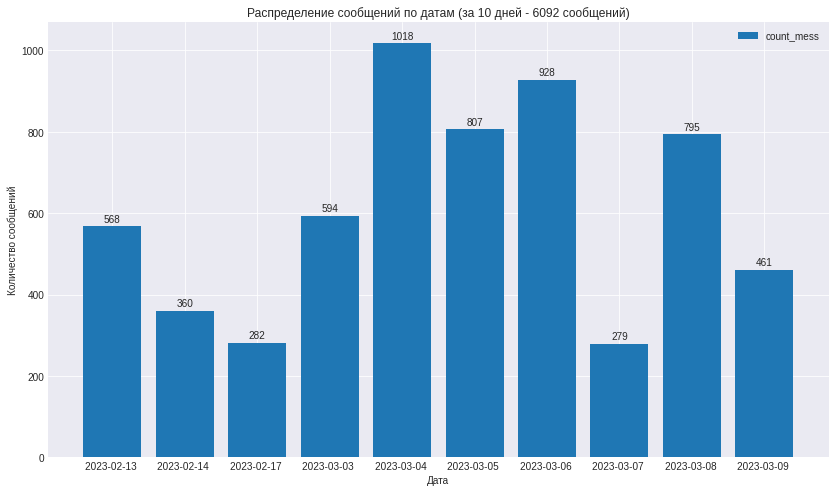

In [174]:
# vibo: data
plot_df = summary.groupby(['date'])['date'].count().to_frame(name='count_mess').reset_index()
groups_x = plot_df['date'].values
values_y = plot_df['count_mess'].values

# vibo: bar chart whith total value labels
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))
  ax.bar(groups_x, values_y, label = "count_mess")

  for i, total in enumerate(values_y):
    ax.text(i, total + 10, values_y[i], ha='center')

  plt.title(f'Распределение сообщений по датам (за {len(groups_x)} дней - {sum(values_y)} сообщений)')
  ax.legend(loc='best')
  ax.set_xlabel('Дата')
  ax.set_ylabel('Количество сообщений')
  plt.show()

#### plt.style.available

In [175]:
# vibo: темы для оформления
for i in enumerate(plt.style.available):
  print(f'{i}')

(0, 'Solarize_Light2')
(1, '_classic_test_patch')
(2, '_mpl-gallery')
(3, '_mpl-gallery-nogrid')
(4, 'bmh')
(5, 'classic')
(6, 'dark_background')
(7, 'fast')
(8, 'fivethirtyeight')
(9, 'ggplot')
(10, 'grayscale')
(11, 'seaborn')
(12, 'seaborn-bright')
(13, 'seaborn-colorblind')
(14, 'seaborn-dark')
(15, 'seaborn-dark-palette')
(16, 'seaborn-darkgrid')
(17, 'seaborn-deep')
(18, 'seaborn-muted')
(19, 'seaborn-notebook')
(20, 'seaborn-paper')
(21, 'seaborn-pastel')
(22, 'seaborn-poster')
(23, 'seaborn-talk')
(24, 'seaborn-ticks')
(25, 'seaborn-white')
(26, 'seaborn-whitegrid')
(27, 'tableau-colorblind10')


In [176]:
# vibo: приведем данные, чтобы забрать день недели
example = summary.groupby(['date'])['date'].count().to_frame(name='count_mess').reset_index()
example = pd.to_datetime(example['date'])

example.dt.day_name()

0       Monday
1      Tuesday
2       Friday
3       Friday
4     Saturday
5       Sunday
6       Monday
7      Tuesday
8    Wednesday
9     Thursday
Name: date, dtype: object

### Категории сообщений

Сообщения сервера классифицируется следующим образом:
* `Async Chat Thread` - чат;
* `Server thread` - игровой процесс;
* `ServerMain` - системные сообщения;
* `User Authenticator` - индентификация пользователя;
* `Worker-Main` - процесс построения мира;
* `WorldGuard Region I/O` (исключили) - плагин WorldGuard.

In [177]:
sorted(list(summary['serv_teg_inf'].unique()))

['Async Chat Thread',
 'Server thread',
 'ServerMain',
 'User Authenticator',
 'Worker-Main']

Визуализируем распределение сообщений по дням с учетом их категорий. Преобразуем данные.

In [178]:
# vibo: преобразуем в датафрейм
plot_df = summary.groupby(['date', 'serv_teg_inf'])['date'].count().reset_index(name="count_mess")
# vibo: группируем без даты
plot_df = plot_df.groupby('serv_teg_inf').sum().reset_index().sort_values('count_mess', ascending=False).reset_index(drop=True)
# vibo: итоговое распределение
plot_df['%'] = plot_df['count_mess'] * 100 / plot_df['count_mess'].sum()
plot_df['%'] = plot_df['%'].round(2)
# vibo: % через div
# plot_df = plot_df.set_index('serv_teg_inf')
# plot_df = plot_df.div(plot_df['count_mess'].sum(axis=0)).reset_index()
plot_df

,serv_teg_inf,count_mess,%
0,Server thread,5003,82.12
1,Worker-Main,891,14.63
2,User Authenticator,93,1.53
3,ServerMain,86,1.41
4,Async Chat Thread,19,0.31


In [179]:
# vibo: понадобится для графиков
sort_labels = list(plot_df['serv_teg_inf'].values)
sort_labels

['Server thread',
 'Worker-Main',
 'User Authenticator',
 'ServerMain',
 'Async Chat Thread']

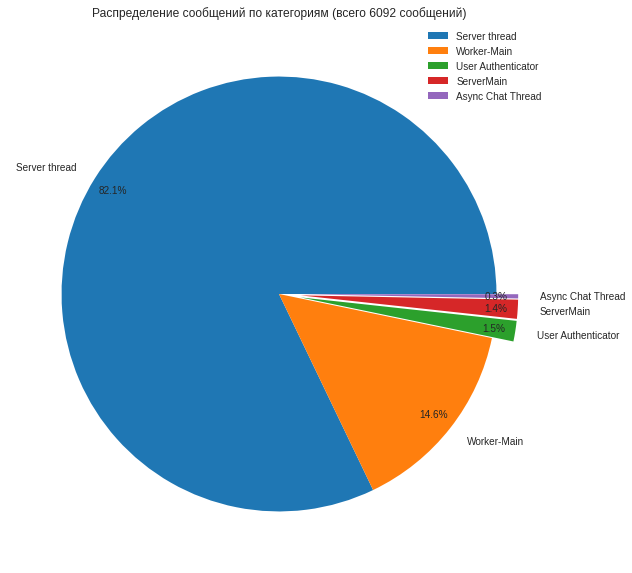

In [180]:
labels = plot_df['serv_teg_inf'].values
value = plot_df['count_mess'].values

# vibo: pie chart
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(10, 10))
  explode = [0, 0, 0.1, 0.1, 0.1]
  ax.pie(value, labels=labels, pctdistance=0.9, explode=explode, autopct='%1.1f%%', labeldistance=1.1)

  plt.title(f'Распределение сообщений по категориям (всего {sum(values_y)} сообщений)')
  ax.legend(loc='best')
  plt.show()

Из графика видно, что большинство сообщений относятся к категории `Server thread` и `Worker-Main`.

In [181]:
# vibo: распределение сообщений по дням, группировка по типам
summary.groupby(['date', 'serv_teg_inf'])['date'].count()

date         serv_teg_inf      
2023-02-13   Server thread         414
             ServerMain             14
             User Authenticator      2
             Worker-Main           138
2023-02-14   Server thread         295
             ServerMain              6
             User Authenticator      1
             Worker-Main            58
2023-02-17   Async Chat Thread      12
             Server thread         233
             ServerMain              3
             User Authenticator      8
             Worker-Main            26
2023-03-03   Server thread         470
             ServerMain              9
             User Authenticator     11
             Worker-Main           104
2023-03-04   Async Chat Thread       1
             Server thread         845
             ServerMain             15
             User Authenticator      3
             Worker-Main           154
2023-03-05   Async Chat Thread       5
             Server thread         694
             ServerMain         

### Категории по дням

In [182]:
# vibo: развернули таблицу, сбросили индекс
plot_df = summary.groupby(['date', 'serv_teg_inf'])['date'].count().unstack('serv_teg_inf').reset_index()
# vibo: заменили пропуски на 0
plot_df = plot_df.fillna(0)
# vibo: перенесли столбец в индекс
plot_df = plot_df.set_index('date')
# vibo: sort_labels сдлеал выше, чтобы цвета сохранить для одной категории сообщения, ресетнули индекс
plot_df = plot_df[sort_labels].reset_index()
plot_df

serv_teg_inf,date,Server thread,Worker-Main,User Authenticator,ServerMain,Async Chat Thread
0,2023-02-13,414.0,138.0,2.0,14.0,0.0
1,2023-02-14,295.0,58.0,1.0,6.0,0.0
2,2023-02-17,233.0,26.0,8.0,3.0,12.0
3,2023-03-03,470.0,104.0,11.0,9.0,0.0
4,2023-03-04,845.0,154.0,3.0,15.0,1.0
5,2023-03-05,694.0,82.0,17.0,9.0,5.0
6,2023-03-06,781.0,111.0,24.0,12.0,0.0
7,2023-03-07,239.0,27.0,10.0,3.0,0.0
8,2023-03-08,668.0,107.0,10.0,9.0,1.0
9,2023-03-09,364.0,84.0,7.0,6.0,0.0


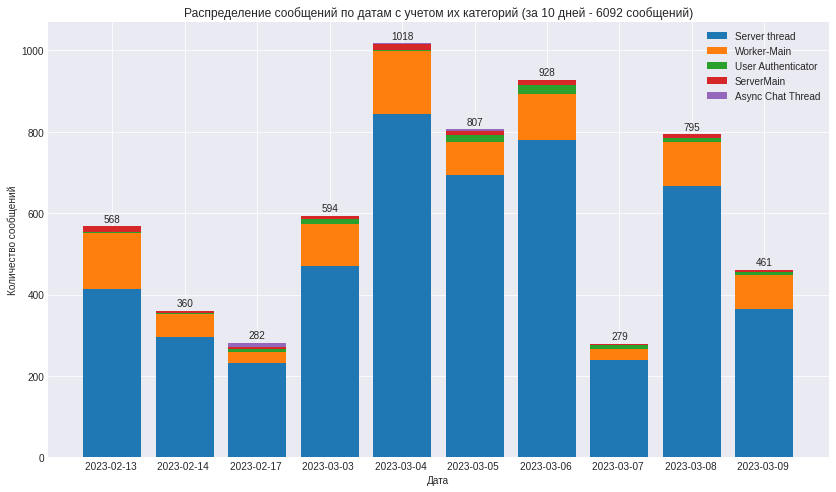

In [183]:
# vibo: data
groups_x = plot_df['date'].values

# vibo: stacked bar chart whith total value labels (matplotlib handmade)
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))

  __values = plot_df[sort_labels[0]].values.copy()
  ax.bar(groups_x, __values, label = sort_labels[0])
  
  for i in range(1, len(sort_labels)):      
    ax.bar(groups_x, plot_df[sort_labels[i]].values, label = sort_labels[i], bottom=__values)
    __values += plot_df[sort_labels[i]].values.copy()

  for i, total in enumerate(values_y):
    ax.text(i, total + 10, values_y[i], ha='center')

  plt.title(f'Распределение сообщений по датам с учетом их категорий (за {len(groups_x)} дней - {sum(values_y)} сообщений)')
  ax.legend(loc='best')
  ax.set_xlabel('Дата')
  ax.set_ylabel('Количество сообщений')
  plt.show()

При большем количестве дней наблюдений можно построить график загрузки от дней недели (усреднить значения). Еще у нас есть столбец время сообщения, можно строить более сложные графики с учетом этих данных.

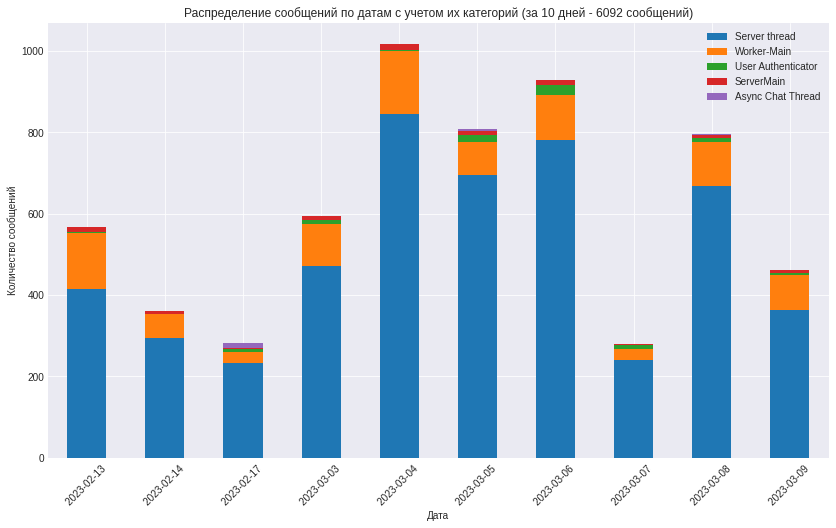

In [184]:
# vibo: stacked bar chart (pandas default -> plot_df.plot.bar)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  plot_df.plot.bar(x='date', stacked=True, figsize=(14, 8))

  plt.title(f'Распределение сообщений по датам с учетом их категорий (за {len(groups_x)} дней - {sum(values_y)} сообщений)')
  plt.legend(loc='best')
  plt.xlabel('Дата')
  plt.xticks(rotation = 45)
  plt.ylabel('Количество сообщений')
  plt.show()

### Типы сообщений

In [185]:
list(summary['serv_teg'].unique())

['INFO', 'ERROR', 'WARN']

In [186]:
# vibo: преобразуем в датафрейм
plot_df = summary.groupby(['date', 'serv_teg'])['date'].count().reset_index(name="count_mess")
# vibo: группируем без даты
plot_df = plot_df.groupby('serv_teg').sum().reset_index().sort_values('count_mess', ascending=False).reset_index(drop=True)
# vibo: итоговое распределение тегов
plot_df['%'] = plot_df['count_mess'] * 100 / plot_df['count_mess'].sum()
plot_df['%'] = plot_df['%'].round(2)
# vibo: % через div
# plot_df = plot_df.set_index('serv_teg')
# plot_df = plot_df.div(plot_df['count_mess'].sum(axis=0)).reset_index()
plot_df

,serv_teg,count_mess,%
0,INFO,5940,97.50
1,WARN,151,2.48
2,ERROR,1,0.02


In [187]:
# vibo: зададим сортировку для графиков
sort_labels = ['INFO', 'WARN', 'ERROR']

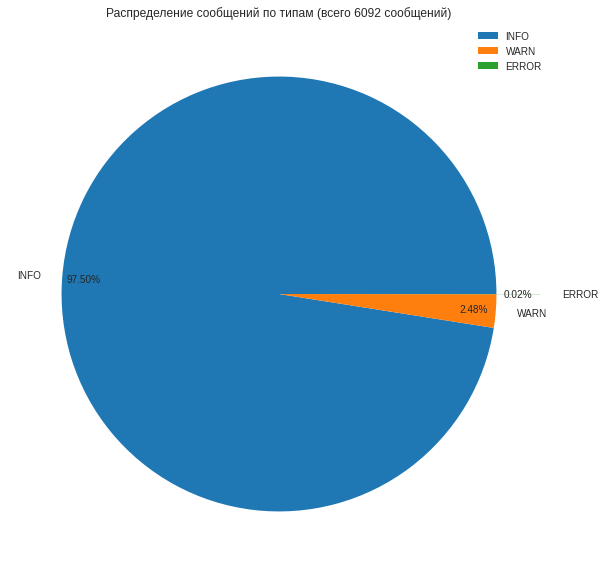

In [188]:
labels = plot_df['serv_teg'].values
value = plot_df['count_mess'].values

# vibo: pie chart
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(10, 10))
  explode = [0, 0, 0.2]
  ax.pie(value, labels=labels, pctdistance=0.9, explode=explode, autopct='%1.2f%%', labeldistance=1.1)

  plt.title(f'Распределение сообщений по типам (всего {sum(values_y)} сообщений)')
  ax.legend(loc='best')
  plt.show()

Видим, что большинство сообщений носят тип `INFO`.

### Типы по дням

In [108]:
# vibo: развернули таблицу, сбросили индекс
plot_df = summary.groupby(['date', 'serv_teg'])['date'].count().unstack('serv_teg').reset_index()
plot_df = plot_df.fillna(0)
plot_df[['date', 'INFO', 'WARN', 'ERROR']]

serv_teg,date,INFO,WARN,ERROR
0,2023-02-13,557.0,10.0,1.0
1,2023-02-14,348.0,12.0,0.0
2,2023-02-17,277.0,5.0,0.0
3,2023-03-03,580.0,14.0,0.0
4,2023-03-04,994.0,24.0,0.0
5,2023-03-05,780.0,27.0,0.0
6,2023-03-06,905.0,23.0,0.0
7,2023-03-07,267.0,12.0,0.0
8,2023-03-08,781.0,14.0,0.0
9,2023-03-09,451.0,10.0,0.0


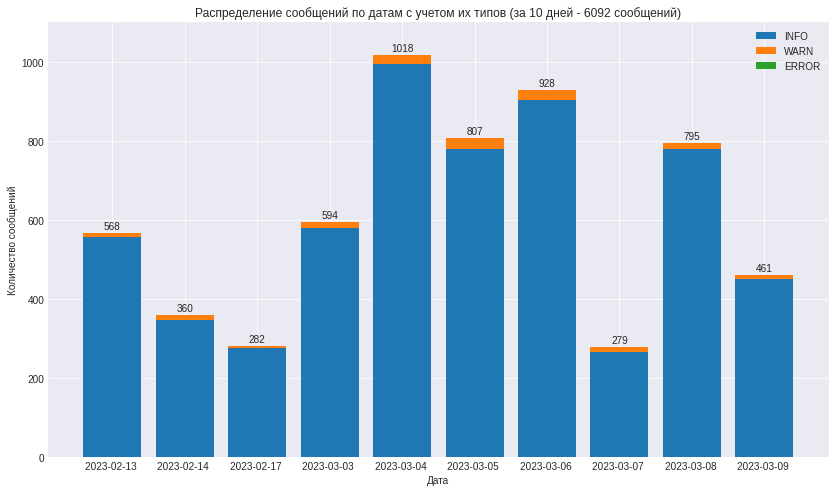

In [111]:
# vibo: data
groups_x = plot_df['date'].values

# vibo: stacked bar chart whith total value labels (matplotlib handmade)
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))

  __values = plot_df[sort_labels[0]].values.copy()
  ax.bar(groups_x, __values, label = sort_labels[0])
  
  for i in range(1, len(sort_labels)):      
    ax.bar(groups_x, plot_df[sort_labels[i]].values, label = sort_labels[i], bottom=__values)
    __values += plot_df[sort_labels[i]].values.copy()

  for i, total in enumerate(values_y):
    ax.text(i, total + 10, values_y[i], ha='center')

  plt.title(f'Распределение сообщений по датам с учетом их типов (за {len(groups_x)} дней - {sum(values_y)} сообщений)')
  ax.legend(loc='best')
  ax.set_xlabel('Дата')
  ax.set_ylim(0, 1100)
  ax.set_ylabel('Количество сообщений')
  plt.show()

Видим, что большинство сообщений носят тип `INFO`.

### Двойные группировки

#### Категория - Тип

Группируем информацию по дате и категориям сообщений (`Async Chat Thread`, `Server thread`, `ServerMain`, `User Authenticator`, `Worker-Main`). Смотрим на количество сообщений по типам (`ERROR`, `WARN`, `INFO`) для каждой категории по дням.

In [145]:
# vibo: получаем мультииндекс
plot_df = summary[['date', 'serv_teg_inf', 'serv_teg', 'serv_mess']].groupby(['date', 'serv_teg_inf', 'serv_teg'])['serv_mess'].count().to_frame()
plot_df

serv_mess
date        serv_teg_inf       serv_teg           
2023-02-13  Server thread      INFO            405
                               WARN              9
            ServerMain         ERROR             1
                               INFO             12
                               WARN              1
            User Authenticator INFO              2
            Worker-Main        INFO            138
2023-02-14  Server thread      INFO            283
                               WARN             12
            ServerMain         INFO              6
            User Authenticator INFO              1
            Worker-Main        INFO             58
2023-02-17  Async Chat Thread  INFO             12
            Server thread      INFO            228
                               WARN              5
            ServerMain         INFO              3
            User Authenticator INFO              8
            Worker-Main        INFO             26
2023-03-03  Server thread      INFO            456
                               WARN             14
            ServerMain         INFO              9
            User Authenticator INFO             11
            Worker-Main        INFO            104
2023-03-04  Async Chat Thread  INFO              1
            Server thread      INFO            821
                               WARN             24
            ServerMain         INFO             15
            User Authenticator INFO              3
            Worker-Main        INFO            154
2023-03-05  Async Chat Thread  INFO              5
            Server thread      INFO            667
                               WARN             27
            ServerMain         INFO              9
            User Authenticator INFO             17
            Worker-Main        INFO             82
2023-03-06  Server thread      INFO            758
                               WARN             23
            ServerMain         INFO             12
            User Authenticator INFO             24
            Worker-Main        INFO            111
2023-03-07  Server thread      INFO            227
                               WARN             12
            ServerMain         INFO              3
            User Authenticator INFO             10
            Worker-Main        INFO             27
2023-03-08  Async Chat Thread  INFO              1
            Server thread      INFO            654
                               WARN             14
            ServerMain         INFO              9
            User Authenticator INFO             10
            Worker-Main        INFO            107
2023-03-09  Server thread      INFO            354
                               WARN             10
            ServerMain         INFO              6
            User Authenticator INFO              7
            Worker-Main        INFO             84

Группировка по категориям сообщений (`Async Chat Thread`, `Server thread`, `ServerMain`, `User Authenticator`, `Worker-Main`). Смотрим на общее количество сообщений по типам (`ERROR`, `WARN`, `INFO`) для своей категории.

In [146]:
plot_df = summary[['serv_teg_inf', 'serv_teg', 'serv_mess']].groupby(['serv_teg_inf', 'serv_teg'])['serv_mess'].count().to_frame()
plot_df

serv_mess
serv_teg_inf       serv_teg           
Async Chat Thread  INFO             19
Server thread      INFO           4853
                   WARN            150
ServerMain         ERROR             1
                   INFO             84
                   WARN              1
User Authenticator INFO             93
Worker-Main        INFO            891

In [147]:
plot_df = plot_df.unstack('serv_teg').reset_index()
plot_df = plot_df.fillna(0)
plot_df

serv_teg_inf serv_mess               
serv_teg                         ERROR    INFO   WARN
0          Async Chat Thread       0.0    19.0    0.0
1              Server thread       0.0  4853.0  150.0
2                 ServerMain       1.0    84.0    1.0
3         User Authenticator       0.0    93.0    0.0
4                Worker-Main       0.0   891.0    0.0

In [148]:
# vibo: убираем мультииндекс
plot_df.columns = ['serv_teg_inf', 'ERROR', 'INFO', 'WARN']
plot_df

,serv_teg_inf,ERROR,INFO,WARN
0,Async Chat Thread,0.0,19.0,0.0
1,Server thread,0.0,4853.0,150.0
2,ServerMain,1.0,84.0,1.0
3,User Authenticator,0.0,93.0,0.0
4,Worker-Main,0.0,891.0,0.0


In [150]:
plot_df = plot_df[['serv_teg_inf', 'INFO', 'WARN', 'ERROR']]
plot_df['count_mess'] = plot_df[['INFO', 'WARN', 'ERROR']].sum(axis=1)
plot_df = plot_df.sort_values('count_mess', ascending=False).reset_index(drop=True)
plot_df

,serv_teg_inf,INFO,WARN,ERROR,count_mess
0,Server thread,4853.0,150.0,0.0,5003.0
1,Worker-Main,891.0,0.0,0.0,891.0
2,User Authenticator,93.0,0.0,0.0,93.0
3,ServerMain,84.0,1.0,1.0,86.0
4,Async Chat Thread,19.0,0.0,0.0,19.0


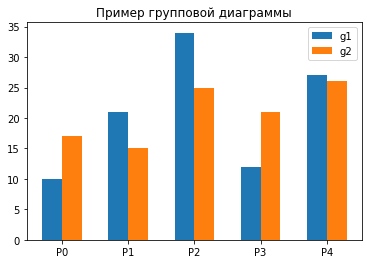

In [289]:
cat_par = [f"P{i}" for i in range(5)]
g1 = [10, 21, 34, 12, 27] 
g2 = [17, 15, 25, 21, 26]
width = 0.3
x = np.arange(len(cat_par))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, g1, width, label='g1')
rects2 = ax.bar(x + width/2, g2, width, label='g2')
ax.set_title('Пример групповой диаграммы')
ax.set_xticks(x)
ax.set_xticklabels(cat_par)
ax.legend()

<BarContainer object of 7 artists>

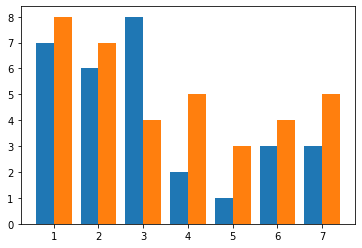

In [288]:
import matplotlib.pyplot as plt

# Data
x1 = ["A", "B", "C"]
x2 = ["A", "B", "C"]
y1 = [3, 5, 1]
y2 = [7, 7, 7]

x1 = np.arange(1, 8) - 0.2
x2 = np.arange(1, 8) + 0.2
y1 = np.random.randint(1, 10, size = 7)
y2 = np.random.randint(1, 10, size = 7)

# Bar plot
fig, ax = plt.subplots()

ax.bar(x = x1, height = y1, width = 0.4)
ax.bar(x = x2, height = y2, width = 0.4)

# plt.show()

#### Тип - Категория

Теперь группируем информацию по дате и тапам сообщений (`ERROR`, `WARN`, `INFO`). Смотрим на количество сообщений по категориям (`Async Chat Thread`, `Server thread`, `ServerMain`, `User Authenticator`, `Worker-Main`) для каждого типа по дням.

In [151]:
plot_df = summary[['date', 'serv_teg_inf', 'serv_teg', 'serv_mess']].groupby(['date', 'serv_teg', 'serv_teg_inf'])['serv_mess'].count().to_frame()
plot_df

serv_mess
date        serv_teg serv_teg_inf                 
2023-02-13  ERROR    ServerMain                  1
            INFO     Server thread             405
                     ServerMain                 12
                     User Authenticator          2
                     Worker-Main               138
            WARN     Server thread               9
                     ServerMain                  1
2023-02-14  INFO     Server thread             283
                     ServerMain                  6
                     User Authenticator          1
                     Worker-Main                58
            WARN     Server thread              12
2023-02-17  INFO     Async Chat Thread          12
                     Server thread             228
                     ServerMain                  3
                     User Authenticator          8
                     Worker-Main                26
            WARN     Server thread               5
2023-03-03  INFO     Server thread             456
                     ServerMain                  9
                     User Authenticator         11
                     Worker-Main               104
            WARN     Server thread              14
2023-03-04  INFO     Async Chat Thread           1
                     Server thread             821
                     ServerMain                 15
                     User Authenticator          3
                     Worker-Main               154
            WARN     Server thread              24
2023-03-05  INFO     Async Chat Thread           5
                     Server thread             667
                     ServerMain                  9
                     User Authenticator         17
                     Worker-Main                82
            WARN     Server thread              27
2023-03-06  INFO     Server thread             758
                     ServerMain                 12
                     User Authenticator         24
                     Worker-Main               111
            WARN     Server thread              23
2023-03-07  INFO     Server thread             227
                     ServerMain                  3
                     User Authenticator         10
                     Worker-Main                27
            WARN     Server thread              12
2023-03-08  INFO     Async Chat Thread           1
                     Server thread             654
                     ServerMain                  9
                     User Authenticator         10
                     Worker-Main               107
            WARN     Server thread              14
2023-03-09  INFO     Server thread             354
                     ServerMain                  6
                     User Authenticator          7
                     Worker-Main                84
            WARN     Server thread              10

Группировка по о типам сообщений (`ERROR`, `WARN`, `INFO`). Смотрим на общее количество сообщений по категориям (`Async Chat Thread`, `Server thread`, `ServerMain`, `User Authenticator`, `Worker-Main`) для совего типа.

In [152]:
plot_df = summary[['serv_teg_inf', 'serv_teg', 'serv_mess']].groupby(['serv_teg', 'serv_teg_inf'])['serv_mess'].count().to_frame()
plot_df

serv_mess
serv_teg serv_teg_inf                 
ERROR    ServerMain                  1
INFO     Async Chat Thread          19
         Server thread            4853
         ServerMain                 84
         User Authenticator         93
         Worker-Main               891
WARN     Server thread             150
         ServerMain                  1

In [153]:
plot_df = plot_df.unstack('serv_teg_inf').reset_index()
plot_df = plot_df.fillna(0)
plot_df

serv_teg         serv_mess                           \
serv_teg_inf          Async Chat Thread Server thread ServerMain   
0               ERROR               0.0           0.0        1.0   
1                INFO              19.0        4853.0       84.0   
2                WARN               0.0         150.0        1.0   

                                             
serv_teg_inf User Authenticator Worker-Main  
0                           0.0         0.0  
1                          93.0       891.0  
2                           0.0         0.0

In [154]:
# vibo: убираем мультииндекс
plot_df.columns = ['serv_teg', 'Async Chat Thread', 'Server thread', 'ServerMain', 'User Authenticator', 'Worker-Main']
plot_df

,serv_teg,Async Chat Thread,Server thread,ServerMain,User Authenticator,Worker-Main
0,ERROR,0.0,0.0,1.0,0.0,0.0
1,INFO,19.0,4853.0,84.0,93.0,891.0
2,WARN,0.0,150.0,1.0,0.0,0.0


In [157]:
plot_df = plot_df[['serv_teg', 'Server thread', 'Worker-Main', 'User Authenticator', 'ServerMain', 'Async Chat Thread']]
plot_df['count_mess'] = plot_df[['serv_teg', 'Server thread', 'Worker-Main', 'User Authenticator', 'ServerMain', 'Async Chat Thread']].sum(axis=1)
plot_df = plot_df.sort_values('count_mess', ascending=False).reset_index(drop=True)
plot_df

<ipython-input-157-15823d17a44c>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plot_df['count_mess'] = plot_df[['serv_teg', 'Server thread', 'Worker-Main', 'User Authenticator', 'ServerMain', 'Async Chat Thread']].sum(axis=1)


,serv_teg,Server thread,Worker-Main,User Authenticator,ServerMain,Async Chat Thread,count_mess
0,INFO,4853.0,891.0,93.0,84.0,19.0,5940.0
1,WARN,150.0,0.0,0.0,1.0,0.0,151.0
2,ERROR,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
summary1[summary1['serv_teg_inf'] == 'Async Chat Thread']

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number
1153,2023-02-17,19:41:22,Async Chat Thread,INFO,[Not Secure] <vibo> привет!!!,NaN,NaN,0
1154,2023-02-17,19:41:54,Async Chat Thread,INFO,[Not Secure] <vibo> ты можешь выдать мне прав...,NaN,NaN,0
1155,2023-02-17,19:42:08,Async Chat Thread,INFO,[Not Secure] <YOUTUBE_plaY> да да,NaN,NaN,0
1157,2023-02-17,19:43:23,Async Chat Thread,INFO,[Not Secure] <YOUTUBE_plaY> всё дал,NaN,NaN,2
1164,2023-02-17,19:45:47,Async Chat Thread,INFO,[Not Secure] <vibo> спасибо! все получилось,NaN,NaN,4
1169,2023-02-17,19:48:23,Async Chat Thread,INFO,[Not Secure] <YOUTUBE_plaY> давй пвп,NaN,NaN,6
1170,2023-02-17,19:48:36,Async Chat Thread,INFO,[Not Secure] <vibo> давай,NaN,NaN,6
1173,2023-02-17,19:49:04,Async Chat Thread,INFO,[Not Secure] <vibo> ты готов?,NaN,NaN,6
1191,2023-02-17,20:05:41,Async Chat Thread,INFO,[Not Secure] <YOUTUBE_plaY> что будем делать,NaN,NaN,8
1192,2023-02-17,20:07:01,Async Chat Thread,INFO,[Not Secure] <vibo> я убрал лаву,NaN,NaN,10


### Ошибки на сервере

Визуализируем информацию по основным сообщениям сервера

In [ ]:
data_logs["serv_teg"].value_counts()

INFO     4945
WARN      127
ERROR       1
Name: serv_teg, dtype: int64

In [ ]:
data_logs["serv_teg_inf"].value_counts()

Server thread            4197
Worker-Main               700
User Authenticator         76
ServerMain                 71
Async Chat Thread          18
WorldGuard Region I/O      11
Name: serv_teg_inf, dtype: int64

In [ ]:
data_logs[data_logs['serv_teg_TEG'] == 'ERROR'][['date', 'time', 'serv_teg_TEG', 'serv_teg_INF', 'serv_mess']]

Ошибка была из-за неправильно заполненного основного конфигурационного файла сервера (server.properties)

### Предупреждения на сервере

In [ ]:
data_logs[data_logs['serv_teg_TEG'] == 'WARN'][['date', 'time', 'serv_teg_TEG', 'serv_teg_INF', 'serv_mess']]

,date,time,serv_teg_TEG,serv_teg_INF,serv_mess
2,2023-02-13,21:31:48,WARN,ServerMain,Failed to load eula.txt
248,2023-02-13,21:36:46,WARN,Server thread,**** SERVER IS RUNNING IN OFFLINE/INSECURE MODE!
249,2023-02-13,21:36:46,WARN,Server thread,The server will make no attempt to authentica...
250,2023-02-13,21:36:46,WARN,Server thread,While this makes the game possible to play wi...
251,2023-02-13,21:36:46,WARN,Server thread,"To change this, set ""online-mode"" to ""true"" i..."
...,...,...,...,...,...
5037,2023-03-06,18:28:56,WARN,Server thread,Can't keep up! Is the server overloaded? Runn...
5048,2023-03-06,18:33:46,WARN,Server thread,Can't keep up! Is the server overloaded? Runn...
5059,2023-03-06,18:40:51,WARN,Server thread,Can't keep up! Is the server overloaded? Runn...
5086,2023-03-06,20:14:40,WARN,Server thread,amogoos dropped their items too quickly!


In [ ]:
data_logs[data_logs['serv_teg_TEG'] == 'WARN'][['date', 'time', 'serv_teg_TEG', 'serv_teg_INF', 'serv_mess']].describe()

,date,time,serv_teg_TEG,serv_teg_INF,serv_mess
count,127,127,127,127,127
unique,7,62,1,2,47
top,2023-03-06,14:58:50,WARN,Server thread,The server will make no attempt to authentica...
freq,35,4,127,126,21


Предупреждение в группе ServerMain

In [ ]:
data_logs[(data_logs['serv_teg_TEG'] == 'WARN') & (data_logs['serv_teg_INF'] == 'ServerMain')][['date', 'time', 'serv_teg_TEG', 'serv_teg_INF', 'serv_mess']]

,date,time,serv_teg_TEG,serv_teg_INF,serv_mess
2,2023-02-13,21:31:48,WARN,ServerMain,Failed to load eula.txt


Предупреждения в группе Server thread

In [ ]:
data_logs[(data_logs['serv_teg_TEG'] == 'WARN') & (data_logs['serv_teg_INF'] == 'Server thread')][['date', 'time', 'serv_teg_TEG', 'serv_teg_INF', 'serv_mess']]

,date,time,serv_teg_TEG,serv_teg_INF,serv_mess
248,2023-02-13,21:36:46,WARN,Server thread,**** SERVER IS RUNNING IN OFFLINE/INSECURE MODE!
249,2023-02-13,21:36:46,WARN,Server thread,The server will make no attempt to authentica...
250,2023-02-13,21:36:46,WARN,Server thread,While this makes the game possible to play wi...
251,2023-02-13,21:36:46,WARN,Server thread,"To change this, set ""online-mode"" to ""true"" i..."
419,2023-02-13,21:59:41,WARN,Server thread,**** SERVER IS RUNNING IN OFFLINE/INSECURE MODE!
...,...,...,...,...,...
5037,2023-03-06,18:28:56,WARN,Server thread,Can't keep up! Is the server overloaded? Runn...
5048,2023-03-06,18:33:46,WARN,Server thread,Can't keep up! Is the server overloaded? Runn...
5059,2023-03-06,18:40:51,WARN,Server thread,Can't keep up! Is the server overloaded? Runn...
5086,2023-03-06,20:14:40,WARN,Server thread,amogoos dropped their items too quickly!


In [ ]:
# vibo: сгруппируем предупреждения по количеству
data_logs[(data_logs['serv_teg_TEG'] == 'WARN') & (data_logs['serv_teg_INF'] == 'Server thread')]['serv_mess'].value_counts()

 **** SERVER IS RUNNING IN OFFLINE/INSECURE MODE!                                                                                                          21
 To change this, set "online-mode" to "true" in the server.properties file.                                                                                21
 The server will make no attempt to authenticate usernames. Beware.                                                                                        21
 While this makes the game possible to play without internet access, it also opens up the ability for hackers to connect with any username they choose.    21
 Can't keep up! Is the server overloaded? Running 5728ms or 114 ticks behind                                                                                1
 YOUTUBE_plaY moved too quickly! 3.6621355768648414,20.437500812113512,-7.9789933784394975                                                                  1
 amogoos moved too quickly! -14.64477740461831,0.0,-

**Итого:**
* сгруппировали сообщения сервера по важности, столбец `serv_teg`  (`INFO`, `WARN`, `ERROR`);
* выделили для возможности последующей группировки основные сообщения сервера в столбец `serv_teg_inf`;
* выделили информацию по номерам `user_authenticator`, `worker_main` и `async_chat_thread`  

Теперь перейдем в выделению информации из дополнительно текстового сообщения сервера в столбце `serv_mess`, перед следующим этапом сохраним логи

In [ ]:
# vibo: сохраняем предобработанный лог
data_logs.to_csv('/content/drive/MyDrive/minecraft/pre_logs.csv', index=False)

## Дополнительные сообщения сервера

In [ ]:
# vibo: читаем предобработанный лог
data_logs = pd.read_csv('/content/drive/MyDrive/minecraft/pre_logs.csv')

In [ ]:
data_logs

,data,time,serv_teg,serv_teg_inf,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess
0,2023-02-13,21:31:47,INFO,ServerMain,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN
1,2023-02-13,21:31:48,ERROR,ServerMain,Failed to load properties from file: server.p...,NaN,NaN,NaN,NaN,NaN
2,2023-02-13,21:31:48,WARN,ServerMain,Failed to load eula.txt,NaN,NaN,NaN,NaN,NaN
3,2023-02-13,21:31:48,INFO,ServerMain,You need to agree to the EULA in order to run...,NaN,NaN,NaN,NaN,NaN
4,2023-02-13,21:34:03,INFO,ServerMain,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,INFO,Server thread,amogoos joined the game,NaN,NaN,NaN,NaN,NaN
5079,2023-03-06,20:21:46,INFO,Server thread,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN,NaN,NaN
5080,2023-03-06,20:57:04,INFO,Server thread,amogoos has completed the challenge [Serious ...,NaN,NaN,NaN,NaN,NaN
5081,2023-03-06,21:02:46,INFO,Server thread,amogoos lost connection: Disconnected,NaN,NaN,NaN,NaN,NaN


In [ ]:
# vibo: сводная статистика
data_logs[['data', 'time', 'serv_teg', 'serv_teg_inf', 'plug_name']].describe()

,data,time,serv_teg,serv_teg_inf,plug_name
count,5083,5073,5073,5073,237
unique,7,994,3,6,3
top,2023-03-06,21:13:39,INFO,Server thread,WorldEdit
freq,1424,115,4945,4197,121


Посмотрим, какую информацию можно выделить из столбца `serv_mess`

### User Name & UUID

In [ ]:
data_logs[data_logs['serv_teg_inf'] == 'User Authenticator'][['data', 'time', 'serv_teg_inf', 'serv_mess', 'user_authenticator_number']]

,data,time,serv_teg_inf,serv_mess,user_authenticator_number
391,2023-02-13,21:49:48,User Authenticator,UUID of player vibO is 426ba0c3-6437-3e82-b36...,1.0
563,2023-02-13,22:01:24,User Authenticator,UUID of player vibO is 426ba0c3-6437-3e82-b36...,1.0
908,2023-02-14,23:53:33,User Authenticator,UUID of player vibO is 426ba0c3-6437-3e82-b36...,1.0
1088,2023-02-17,19:05:26,User Authenticator,UUID of player YOUTUBE_plaY is 56eb670a-4ed0-...,1.0
1094,2023-02-17,19:07:53,User Authenticator,UUID of player YOUTUBE_plaY is 56eb670a-4ed0-...,2.0
...,...,...,...,...,...
5033,2023-03-06,18:40:25,User Authenticator,UUID of player Fredi is 1ee24d02-4446-35e1-84...,6.0
5039,2023-03-06,18:42:27,User Authenticator,UUID of player test_name_1 is a101608a-3944-3...,7.0
5060,2023-03-06,20:14:05,User Authenticator,UUID of player amogoos is bb8d3a15-62ea-3dd7-...,8.0
5066,2023-03-06,20:14:44,User Authenticator,UUID of player amogoos is bb8d3a15-62ea-3dd7-...,9.0


Всего 76 сообщений о аутентицикации игроков на сервере. Проверим это по столбцу `serv_mess`

In [ ]:
data_logs['user_is_authenticate'] = data_logs['serv_mess'].dropna().map(lambda x: 'UUID of player' in x)
data_logs[data_logs['user_is_authenticate'] == True][['data', 'time', 'serv_teg_inf', 'serv_mess', 'user_authenticator_number', 'user_is_authenticate']]

,data,time,serv_teg_inf,serv_mess,user_authenticator_number,user_is_authenticate
391,2023-02-13,21:49:48,User Authenticator,UUID of player vibO is 426ba0c3-6437-3e82-b36...,1.0,True
563,2023-02-13,22:01:24,User Authenticator,UUID of player vibO is 426ba0c3-6437-3e82-b36...,1.0,True
908,2023-02-14,23:53:33,User Authenticator,UUID of player vibO is 426ba0c3-6437-3e82-b36...,1.0,True
1088,2023-02-17,19:05:26,User Authenticator,UUID of player YOUTUBE_plaY is 56eb670a-4ed0-...,1.0,True
1094,2023-02-17,19:07:53,User Authenticator,UUID of player YOUTUBE_plaY is 56eb670a-4ed0-...,2.0,True
...,...,...,...,...,...,...
5033,2023-03-06,18:40:25,User Authenticator,UUID of player Fredi is 1ee24d02-4446-35e1-84...,6.0,True
5039,2023-03-06,18:42:27,User Authenticator,UUID of player test_name_1 is a101608a-3944-3...,7.0,True
5060,2023-03-06,20:14:05,User Authenticator,UUID of player amogoos is bb8d3a15-62ea-3dd7-...,8.0,True
5066,2023-03-06,20:14:44,User Authenticator,UUID of player amogoos is bb8d3a15-62ea-3dd7-...,9.0,True


Пример расшифровки UUID из интернета

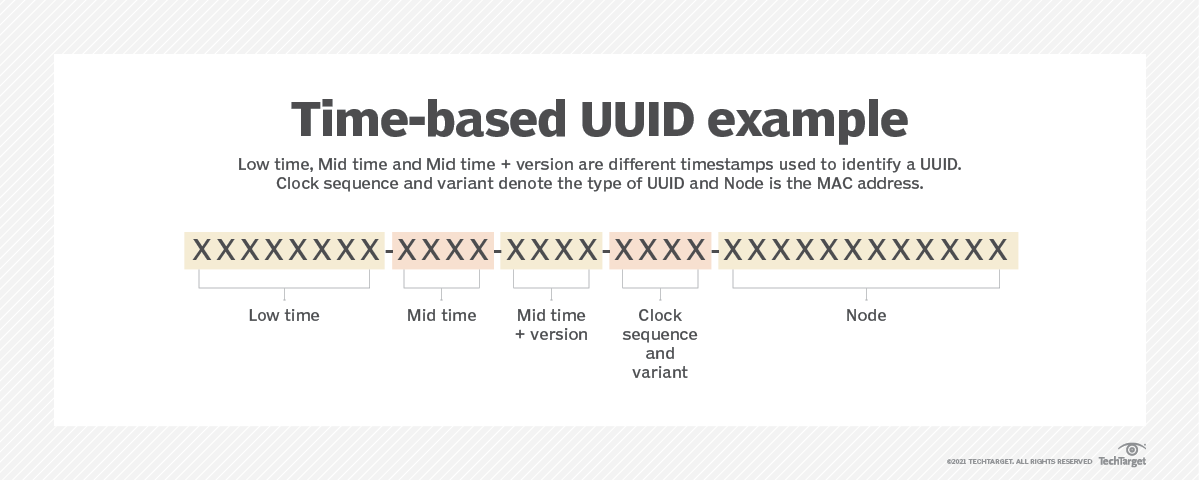

In [ ]:
# vibo: выделяем имя пользователя и его UUID
data_logs['user_name'] = data_logs[data_logs['serv_teg_inf'] == 'User Authenticator']['serv_mess'].map(lambda x: x.split()[3])
data_logs['uuid'] = data_logs[data_logs['serv_teg_inf'] == 'User Authenticator']['serv_mess'].map(lambda x: x.split()[5])
data_logs[data_logs['serv_teg_inf'] == 'User Authenticator'][['data', 'time', 'serv_teg_inf', 'user_authenticator_number', 'user_name', 'uuid']]

,data,time,serv_teg_inf,user_authenticator_number,user_name,uuid
391,2023-02-13,21:49:48,User Authenticator,1.0,vibO,426ba0c3-6437-3e82-b36b-ca953fb41a42
563,2023-02-13,22:01:24,User Authenticator,1.0,vibO,426ba0c3-6437-3e82-b36b-ca953fb41a42
908,2023-02-14,23:53:33,User Authenticator,1.0,vibO,426ba0c3-6437-3e82-b36b-ca953fb41a42
1088,2023-02-17,19:05:26,User Authenticator,1.0,YOUTUBE_plaY,56eb670a-4ed0-3009-9bc9-00d047fbaeff
1094,2023-02-17,19:07:53,User Authenticator,2.0,YOUTUBE_plaY,56eb670a-4ed0-3009-9bc9-00d047fbaeff
...,...,...,...,...,...,...
5033,2023-03-06,18:40:25,User Authenticator,6.0,Fredi,1ee24d02-4446-35e1-84c8-4b785c1bae33
5039,2023-03-06,18:42:27,User Authenticator,7.0,test_name_1,a101608a-3944-3398-a11e-16211546e19a
5060,2023-03-06,20:14:05,User Authenticator,8.0,amogoos,bb8d3a15-62ea-3dd7-8df8-776e0930f557
5066,2023-03-06,20:14:44,User Authenticator,9.0,amogoos,bb8d3a15-62ea-3dd7-8df8-776e0930f557


UUID привязан к имени пользователя

In [ ]:
# vibo: суммарное количество аутентификаций пользователей за период
data_logs[data_logs['serv_teg_inf'] == 'User Authenticator'].groupby(['serv_mess']).size().sort_values(ascending=False)

serv_mess
 UUID of player testing1 is 4e9071c3-79ab-3a3a-ab83-2e04eacd6854            15
 UUID of player YOUTUBE_plaY is 56eb670a-4ed0-3009-9bc9-00d047fbaeff        14
 UUID of player amogoos is bb8d3a15-62ea-3dd7-8df8-776e0930f557             12
 UUID of player testing2 is 5e20431e-cf2a-314e-a557-c5525d567366             7
 UUID of player rex is 74d83d51-5bf6-37fb-8395-9a0590a59259                  6
 UUID of player vibo is f4a7e80b-36fa-3e7a-814b-9824a8ccd5f9                 6
 UUID of player Fredi is 1ee24d02-4446-35e1-84c8-4b785c1bae33                3
 UUID of player gggggg102 is d755a875-1b70-3b66-bd19-b2b67e593159            3
 UUID of player vibO is 426ba0c3-6437-3e82-b36b-ca953fb41a42                 3
 UUID of player LOLOTUK is 351abe30-df95-37d4-940e-b868831fc026              2
 UUID of player amogoos_red is 9f566d31-b9cd-3069-9068-967914755363          1
 UUID of player amogoos_red15050 is 90c58b0a-047b-3f41-a2eb-0b295facaf2a     1
 UUID of player test_name_1 is a101608a-39

In [ ]:
# vibo: уникальные аутентифицированные пользователи
sorted(list(data_logs[data_logs['serv_teg_inf'] == 'User Authenticator']['user_name'].unique()))

['Fredi',
 'LOLOTUK',
 'YOUTUBE_plaY',
 'amogoos',
 'amogoos_red',
 'amogoos_red15050',
 'gggggg102',
 'rex',
 'test_name_1',
 'testing1',
 'testing2',
 'testing3',
 'testing4',
 'vibO',
 'vibo']

In [ ]:
# vibo: количество уникальных аутентицированных пользователей
len(list(data_logs[data_logs['serv_teg_inf'] == 'User Authenticator']['user_name'].unique()))

15

In [ ]:
# vibo: количество аутентификаций в группировке по пользователям
data_logs[data_logs['serv_teg_inf'] == 'User Authenticator'].groupby(['user_name']).size().sort_values(ascending=False)

user_name
testing1            15
YOUTUBE_plaY        14
amogoos             12
testing2             7
rex                  6
vibo                 6
Fredi                3
gggggg102            3
vibO                 3
LOLOTUK              2
amogoos_red          1
amogoos_red15050     1
test_name_1          1
testing3             1
testing4             1
dtype: int64

In [ ]:
# vibo: количество аутентицикаций в день
data_logs[data_logs['serv_teg_inf'] == 'User Authenticator'].groupby(['data']).size()

data
2023-02-13      2
2023-02-14      1
2023-02-17      8
2023-03-03     11
2023-03-04      3
2023-03-05     17
2023-03-06     34
dtype: int64

In [ ]:
# vibo: количество аутентификаций пользователей по дням с группировкой по пользователям
data_logs[data_logs['serv_teg_inf'] == 'User Authenticator'].groupby(['data', 'user_name'])[['user_name']].size()

data         user_name       
2023-02-13   vibO                 2
2023-02-14   vibO                 1
2023-02-17   YOUTUBE_plaY         5
             vibo                 3
2023-03-03   LOLOTUK              2
             YOUTUBE_plaY         6
             rex                  3
2023-03-04   rex                  3
2023-03-05   YOUTUBE_plaY         3
             amogoos              7
             amogoos_red          1
             amogoos_red15050     1
             gggggg102            1
             testing1             1
             vibo                 3
2023-03-06   Fredi                3
             amogoos              5
             gggggg102            2
             test_name_1          1
             testing1            14
             testing2             7
             testing3             1
             testing4             1
dtype: int64

### Оператор сервера

Продолжаем выделять информацию из дополнительного сообщения сервера, посмотрим, кто из пользователей был наделен правом оператора сервера.

In [ ]:
data_logs['is_op'] = data_logs['serv_mess'].dropna().map(lambda x: 'server operator' in x).to_frame()
data_logs[data_logs['is_op'] == True][['data', 'time', 'serv_mess', 'is_op']]

,data,time,serv_mess,is_op
398,2023-02-13,21:57:06,Made vibO a server operator,True
1097,2023-02-17,19:10:02,Made YOUTUBE_plaY a server operator,True
1152,2023-02-17,19:45:04,Made vibo a server operator,True
1376,2023-03-03,18:03:24,Made LOLOTUK a server operator,True
1620,2023-03-03,19:42:04,Made rex a server operator,True
3163,2023-03-05,12:57:45,Made amogoos a server operator,True
3188,2023-03-05,13:13:49,Made amogoos a server operator,True
3562,2023-03-05,15:33:25,Made testing1 a server operator,True
3901,2023-03-06,20:26:21,Made testing2 a server operator,True
4245,2023-03-06,21:04:44,Made testing3 a server operator,True


In [ ]:
ind_op = data_logs[data_logs['is_op'] == True].index
ind_op

Int64Index([398, 1097, 1152, 1376, 1620, 3163, 3188, 3562, 3901, 4245, 4958,
            4981],
           dtype='int64')

In [ ]:
data_logs[data_logs.index.isin(ind_op)][['data', 'time', 'serv_mess', 'is_op']]

,data,time,serv_mess,is_op
398,2023-02-13,21:57:06,Made vibO a server operator,True
1097,2023-02-17,19:10:02,Made YOUTUBE_plaY a server operator,True
1152,2023-02-17,19:45:04,Made vibo a server operator,True
1376,2023-03-03,18:03:24,Made LOLOTUK a server operator,True
1620,2023-03-03,19:42:04,Made rex a server operator,True
3163,2023-03-05,12:57:45,Made amogoos a server operator,True
3188,2023-03-05,13:13:49,Made amogoos a server operator,True
3562,2023-03-05,15:33:25,Made testing1 a server operator,True
3901,2023-03-06,20:26:21,Made testing2 a server operator,True
4245,2023-03-06,21:04:44,Made testing3 a server operator,True


In [ ]:
# vibo: выделим имя оператора сервера
data_logs['op_name'] = data_logs[data_logs.index.isin(ind_op)]['serv_mess'].map(lambda x: x.split()[1])
data_logs[data_logs['is_op'] == True][['data', 'time', 'serv_mess', 'is_op', 'op_name']]

,data,time,serv_mess,is_op,op_name
398,2023-02-13,21:57:06,Made vibO a server operator,True,vibO
1097,2023-02-17,19:10:02,Made YOUTUBE_plaY a server operator,True,YOUTUBE_plaY
1152,2023-02-17,19:45:04,Made vibo a server operator,True,vibo
1376,2023-03-03,18:03:24,Made LOLOTUK a server operator,True,LOLOTUK
1620,2023-03-03,19:42:04,Made rex a server operator,True,rex
3163,2023-03-05,12:57:45,Made amogoos a server operator,True,amogoos
3188,2023-03-05,13:13:49,Made amogoos a server operator,True,amogoos
3562,2023-03-05,15:33:25,Made testing1 a server operator,True,testing1
3901,2023-03-06,20:26:21,Made testing2 a server operator,True,testing2
4245,2023-03-06,21:04:44,Made testing3 a server operator,True,testing3


In [ ]:
# vibo: уникальные пользователи, получившие права оператора сервера
sorted(list(data_logs[data_logs['is_op'] == True]['op_name'].unique()))

['Fredi',
 'LOLOTUK',
 'YOUTUBE_plaY',
 'amogoos',
 'rex',
 'testing1',
 'testing2',
 'testing3',
 'vibO',
 'vibo']

In [ ]:
# vibo: количество уникальных пользователей, получивших права оператора сервера
len(list(data_logs[data_logs['is_op'] == True]['op_name'].unique()))

10

In [ ]:
# vibo: когда были выданы права администратора
data_logs[data_logs['is_op'] == True].groupby(['data', 'time', 'op_name'])[['op_name']].size()

data         time      op_name     
2023-02-13   21:57:06  vibO            1
2023-02-17   19:10:02  YOUTUBE_plaY    1
             19:45:04  vibo            1
2023-03-03   18:03:24  LOLOTUK         1
             19:42:04  rex             1
2023-03-05   12:57:45  amogoos         1
             13:13:49  amogoos         1
             15:33:25  testing1        1
2023-03-06   14:49:00  Fredi           1
             18:01:36  Fredi           1
             20:26:21  testing2        1
             21:04:44  testing3        1
dtype: int64

### Игровой чат

In [ ]:
data_logs[data_logs['serv_teg_inf'] == 'Async Chat Thread'][['data', 'time', 'serv_teg_inf', 'serv_mess']]

,data,time,serv_teg_inf,serv_mess
1146,2023-02-17,19:41:22,Async Chat Thread,[Not Secure] <vibo> привет!!!
1147,2023-02-17,19:41:54,Async Chat Thread,[Not Secure] <vibo> ты можешь выдать мне прав...
1148,2023-02-17,19:42:08,Async Chat Thread,[Not Secure] <YOUTUBE_plaY> да да
1150,2023-02-17,19:43:23,Async Chat Thread,[Not Secure] <YOUTUBE_plaY> всё дал
1157,2023-02-17,19:45:47,Async Chat Thread,[Not Secure] <vibo> спасибо! все получилось
1162,2023-02-17,19:48:23,Async Chat Thread,[Not Secure] <YOUTUBE_plaY> давй пвп
1163,2023-02-17,19:48:36,Async Chat Thread,[Not Secure] <vibo> давай
1166,2023-02-17,19:49:04,Async Chat Thread,[Not Secure] <vibo> ты готов?
1184,2023-02-17,20:05:41,Async Chat Thread,[Not Secure] <YOUTUBE_plaY> что будем делать
1185,2023-02-17,20:07:01,Async Chat Thread,[Not Secure] <vibo> я убрал лаву


### А что еще?

In [ ]:
data_logs

,data,time,serv_teg,serv_teg_inf,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess,user_is_authenticate,user_name,uuid,is_op,op_name
0,2023-02-13,21:31:47,INFO,ServerMain,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
1,2023-02-13,21:31:48,ERROR,ServerMain,Failed to load properties from file: server.p...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
2,2023-02-13,21:31:48,WARN,ServerMain,Failed to load eula.txt,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
3,2023-02-13,21:31:48,INFO,ServerMain,You need to agree to the EULA in order to run...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
4,2023-02-13,21:34:03,INFO,ServerMain,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,INFO,Server thread,amogoos joined the game,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
5079,2023-03-06,20:21:46,INFO,Server thread,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
5080,2023-03-06,20:57:04,INFO,Server thread,amogoos has completed the challenge [Serious ...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
5081,2023-03-06,21:02:46,INFO,Server thread,amogoos lost connection: Disconnected,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN


Информации в `serv_mess` много, вот, например, что можно:
* вывести время загрузки сервера от старта до метки `Done` (например, `66.075s`);
* найти время работы сервера (между `Starting minecraft server` и `Stopping server`);
* найти время игры каждого пользователя (`vibO joined the game` и `vibO left the game`);
* найти сколько раз игрок погибал и по какой причине (застрелен скелетом, утонул и т.д.);
* найти время 'жизни' персонажа в реальном времение между началом игры и смертью;
* найти кто к кому телепортируется и таким образом строить граф взаимодействия между игроками.

Также можно продолжить поиск информации уже по установленным плагинам (столбец `plug_mess`).